<font color='Black' size=+1> **Analysis Of Alumni Chats / Graduate student chat analysis** <br>

**О проекте «Яндекс Практикум»**

**Задача:** 
Создание системы анализа чатов выпускников, чтобы выявить наиболее обсуждаемые темы и улучшить качество взаимодействия в сообществах, состоящих из 42 тысяч участников.

**Ожидаемый результат:** 
Разработка скрипта для анализа сообщений, который позволит:
- Повысить вовлеченность участников.
- Снизить рабочую нагрузку на комьюнити-менеджеров на 30%.
- Увеличить конверсию вступления в выпускные сообщества на 5%.

**Основные функции скрипта:**
- Инструмент для анализа переписок.
- Суммаризация информации и написание итогов обсуджений в двух форматах: 
  - Дайджест для участников с настройкой периодичности (ежедневно, еженедельно, ежемесячно).
  - Рейтинг обсуждаемых тем для комьюнити-менеджеров.
  
Скрипт будет собирать данные о количестве сообщений за указанные временные промежутки и сохранять результаты в CSV-файле. Ожидается завершение проекта к концу марта. Вопросы безопасности по обработке данных требуют обсуждения с командой.

In [1]:
print("#" * 60)
#######################
###Название проекта:
###<font color='Black' size=+1> **Анализ чата выпускников Яндекс.Практикум** <br>
#######################

print("#" * 60)
#######################
###<font color='Black' size=+1> **Краткое описание проекта:** <br>
#######################

print("#" * 60)
#######################
###<font color='Black' size=+1> **Цель исследования:** <br>
#######################

print("#" * 60)
#######################
###<font color='Black' size=+1> **Контекст исследования:** <br>
#######################

print("#" * 60)
#######################
###<font color='Black' size=+1> **План исследования:** <br>
#######################

############################################################
############################################################
############################################################
############################################################
############################################################


In [2]:
# Установка необходимых пакетов
!pip install -q \
    pymorphy2 \
    sentence-transformers \
    umap-learn \
    hdbscan \
    plotly \
    wordcloud \
    scikit-learn \
    gradio \
    transformers \
    accelerate \
    torch \
    pandas \
    bitsandbytes \
    sentencepiece \
    hf_xet \
    huggingface_hub[hf_xet]

# Обновление pandas, gradio, transformers и bitsandbytes
!pip install --upgrade -q pandas gradio transformers bitsandbytes

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 32.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 22.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 32.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 72.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Импортируем необходимые библиотеки
import json
import re
import numpy as np
import pandas as pd
import textwrap
from datetime import datetime, timedelta
from pathlib import Path
import torch
from tqdm import tqdm

# Импортируем библиотеки для обработки текстов
import nltk
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

# Импортируем библиотеки для машинного обучения и кластеризации
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Импортируем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Импортируем библиотеки для работы с интерфейсом
import gradio as gr
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from huggingface_hub import login

# Настройка предупреждений
import warnings
warnings.filterwarnings("ignore")

# Настройки pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Константы
RANDOM_STATE = 280225
SAMPLE_SIZE = 5

# Инициализация NLTK и морфологического анализатора
nltk.download('stopwords', quiet=True)  # Загружаем стоп-слова без вывода сообщений
stop_words = set(stopwords.words('russian')).union(set(stopwords.words('english')))
morph = MorphAnalyzer()

# Установка переменных окружения для оптимизации Hugging Face
import os
os.environ["HF_HUB_XET_USE_HTTPS"] = "1"
os.environ["HF_HUB_XET_USE_VERSIONING"] = "1"

# Проверка поддержки Xet без вывода ошибок
try:
    from huggingface_hub import HfFileSystem
    if hasattr(HfFileSystem, 'xet_available'):
        os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
except ImportError:
    pass

In [4]:
#######################
# Определение путей к директориям и файлам
def load_data(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return pd.DataFrame(data)
    except FileNotFoundError as e:
        print(f"Ошибка при загрузке файла {file_path}: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Ошибка при чтении JSON в файле {file_path}: {e}")
        return None

# Пути к файлам
file_paths = {
    'data': '/kaggle/input/3-data-base-json/data/result.json',
    'management': '/kaggle/input/3-data-base-json/managment/result.json',
    'marketing': '/kaggle/input/3-data-base-json/marketing/result.json',
    'go': '/kaggle/input/3-data-base-march-json/go/result.json',
    'java': '/kaggle/input/3-data-base-march-json/java/result.json',
    'web': '/kaggle/input/3-data-base-march-json/web/result.json'
}

# Загрузка всех датасетов
dataframes = {name: load_data(path) for name, path in file_paths.items()}

# Удаление None значений (незагруженных датасетов)
dataframes = {k: v for k, v in dataframes.items() if v is not None}

# Функция для отображения информации о загруженных датафреймах
def display_dataframes(dfs: dict) -> None:
    """Отображение информации о загруженных датафреймах."""
    for name, df in dfs.items():
        print(f'Описание данных {name}:')
        display(df.head())
        print("-" * 40)
        display(df.info())
        print("-" * 40)
        print('')

# Отображение информации о всех датафреймах
if dataframes:
    display_dataframes(dataframes)
    print('Все данные загружены и отображены.')
else:
    print('Не удалось загрузить ни один датасет.')

Описание данных data:


name                type          id  \
0  💬 Data Practicum Chat  private_supergroup  1379846874   
1  💬 Data Practicum Chat  private_supergroup  1379846874   
2  💬 Data Practicum Chat  private_supergroup  1379846874   
3  💬 Data Practicum Chat  private_supergroup  1379846874   
4  💬 Data Practicum Chat  private_supergroup  1379846874   

                                            messages  
0  {'id': 266690, 'type': 'service', 'date': '202...  
1  {'id': 266691, 'type': 'service', 'date': '202...  
2  {'id': 266693, 'type': 'message', 'date': '202...  
3  {'id': 266694, 'type': 'message', 'date': '202...  
4  {'id': 266695, 'type': 'message', 'date': '202...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1007 non-null   object
 1   type      1007 non-null   object
 2   id        1007 non-null   int64 
 3   messages  1007 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.6+ KB


None

----------------------------------------

Описание данных management:


name             type          id  \
0  MANAGEMENT ALUMNI PRACTICUM  private_channel  1586396652   
1  MANAGEMENT ALUMNI PRACTICUM  private_channel  1586396652   
2  MANAGEMENT ALUMNI PRACTICUM  private_channel  1586396652   
3  MANAGEMENT ALUMNI PRACTICUM  private_channel  1586396652   
4  MANAGEMENT ALUMNI PRACTICUM  private_channel  1586396652   

                                            messages  
0  {'id': 856, 'type': 'message', 'date': '2025-0...  
1  {'id': 857, 'type': 'message', 'date': '2025-0...  
2  {'id': 858, 'type': 'message', 'date': '2025-0...  
3  {'id': 859, 'type': 'message', 'date': '2025-0...  
4  {'id': 860, 'type': 'message', 'date': '2025-0...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      13 non-null     object
 1   type      13 non-null     object
 2   id        13 non-null     int64 
 3   messages  13 non-null     object
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


None

----------------------------------------

Описание данных marketing:


name                type          id  \
0  💬 Marketing Practicum Chat  private_supergroup  1782474569   
1  💬 Marketing Practicum Chat  private_supergroup  1782474569   
2  💬 Marketing Practicum Chat  private_supergroup  1782474569   
3  💬 Marketing Practicum Chat  private_supergroup  1782474569   
4  💬 Marketing Practicum Chat  private_supergroup  1782474569   

                                            messages  
0  {'id': 42471, 'type': 'message', 'date': '2025...  
1  {'id': 42472, 'type': 'message', 'date': '2025...  
2  {'id': 42473, 'type': 'message', 'date': '2025...  
3  {'id': 42474, 'type': 'message', 'date': '2025...  
4  {'id': 42475, 'type': 'message', 'date': '2025...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3680 non-null   object
 1   type      3680 non-null   object
 2   id        3680 non-null   int64 
 3   messages  3680 non-null   object
dtypes: int64(1), object(3)
memory usage: 115.1+ KB


None

----------------------------------------

Описание данных go:


name                type          id  \
0  Go 💬 Community Chat  private_supergroup  1684629693   
1  Go 💬 Community Chat  private_supergroup  1684629693   
2  Go 💬 Community Chat  private_supergroup  1684629693   
3  Go 💬 Community Chat  private_supergroup  1684629693   
4  Go 💬 Community Chat  private_supergroup  1684629693   

                                            messages  
0  {'id': 1359, 'type': 'message', 'date': '2025-...  
1  {'id': 1360, 'type': 'message', 'date': '2025-...  
2  {'id': 1361, 'type': 'message', 'date': '2025-...  
3  {'id': 1362, 'type': 'service', 'date': '2025-...  
4  {'id': 1363, 'type': 'service', 'date': '2025-...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      67 non-null     object
 1   type      67 non-null     object
 2   id        67 non-null     int64 
 3   messages  67 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


None

----------------------------------------

Описание данных java:


name                type          id  \
0  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
1  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
2  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
3  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
4  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   

                                            messages  
0  {'id': 25300, 'type': 'service', 'date': '2025...  
1  {'id': 25301, 'type': 'service', 'date': '2025...  
2  {'id': 25302, 'type': 'message', 'date': '2025...  
3  {'id': 25303, 'type': 'service', 'date': '2025...  
4  {'id': 25304, 'type': 'service', 'date': '2025...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1851 non-null   object
 1   type      1851 non-null   object
 2   id        1851 non-null   int64 
 3   messages  1851 non-null   object
dtypes: int64(1), object(3)
memory usage: 58.0+ KB


None

----------------------------------------

Описание данных web:


name                type          id  \
0  Web 💬 Community Chat  private_supergroup  1664762377   
1  Web 💬 Community Chat  private_supergroup  1664762377   
2  Web 💬 Community Chat  private_supergroup  1664762377   
3  Web 💬 Community Chat  private_supergroup  1664762377   
4  Web 💬 Community Chat  private_supergroup  1664762377   

                                            messages  
0  {'id': 16806, 'type': 'service', 'date': '2025...  
1  {'id': 16807, 'type': 'message', 'date': '2025...  
2  {'id': 16808, 'type': 'service', 'date': '2025...  
3  {'id': 16809, 'type': 'message', 'date': '2025...  
4  {'id': 16810, 'type': 'service', 'date': '2025...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      102 non-null    object
 1   type      102 non-null    object
 2   id        102 non-null    int64 
 3   messages  102 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


None

----------------------------------------

Все данные загружены и отображены.


In [5]:
#######################
###<div class="alert alert-info">
###<font color='Black' size=+1> **Промежуточный вывод** <br>
### Краткий вывод по полученным результатам

In [6]:
#######################
# Создаем новый словарь с выбранными датасетами (в данном случае только marketing)
#selected_datasets = {
#    'marketing_df': dataframes.get('marketing')
#}

# Альтернативный вариант: как пример выбора нескольких датасетов(три самых наполненных сообщениями)
selected_datasets = {
    'data_df': dataframes.get('data'),
    'marketing_df': dataframes.get('marketing'),
    'java_df': dataframes.get('java')
}

# Функция для вывода случайных строк из словаря датафреймов
def display_random_samples(datasets_dict: dict, sample_size: int = SAMPLE_SIZE, random_state: int = RANDOM_STATE) -> None:
    """
    Выводит случайные строки из каждого датафрейма в словаре.
    
    Параметры:
    datasets_dict - словарь с датафреймами
    sample_size - количество случайных строк для вывода
    random_state - seed для воспроизводимости результатов
    """
    for name, df in datasets_dict.items():
        if df is not None:
            print("#" * 60)
            print(f"### Случайные {sample_size} строк из датафрейма: {name}")
            display(df.sample(sample_size, random_state=random_state))
            print("\n")
        else:
            print("#" * 60)
            print(f"### Датафрейм {name} не загружен или пуст")
            print("\n")

# Выводим случайные строки из выбранных датасетов
print("\n" + "#" * 60)
print("### Вывод случайных строк из выбранных датасетов")
display_random_samples(selected_datasets)


############################################################
### Вывод случайных строк из выбранных датасетов
############################################################
### Случайные 5 строк из датафрейма: data_df


name                type          id  \
396  💬 Data Practicum Chat  private_supergroup  1379846874   
563  💬 Data Practicum Chat  private_supergroup  1379846874   
466  💬 Data Practicum Chat  private_supergroup  1379846874   
84   💬 Data Practicum Chat  private_supergroup  1379846874   
484  💬 Data Practicum Chat  private_supergroup  1379846874   

                                              messages  
396  {'id': 267134, 'type': 'message', 'date': '202...  
563  {'id': 267354, 'type': 'message', 'date': '202...  
466  {'id': 267227, 'type': 'message', 'date': '202...  
84   {'id': 266784, 'type': 'message', 'date': '202...  
484  {'id': 267249, 'type': 'service', 'date': '202...



############################################################
### Случайные 5 строк из датафрейма: marketing_df


name                type          id  \
1619  💬 Marketing Practicum Chat  private_supergroup  1782474569   
521   💬 Marketing Practicum Chat  private_supergroup  1782474569   
1243  💬 Marketing Practicum Chat  private_supergroup  1782474569   
2615  💬 Marketing Practicum Chat  private_supergroup  1782474569   
665   💬 Marketing Practicum Chat  private_supergroup  1782474569   

                                               messages  
1619  {'id': 44171, 'type': 'message', 'date': '2025...  
521   {'id': 43018, 'type': 'message', 'date': '2025...  
1243  {'id': 43775, 'type': 'message', 'date': '2025...  
2615  {'id': 45230, 'type': 'message', 'date': '2025...  
665   {'id': 43174, 'type': 'message', 'date': '2025...



############################################################
### Случайные 5 строк из датафрейма: java_df


name                type          id  \
1280  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
50    Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
61    Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
1721  Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   
460   Java-developer 💬 Chat Alumni Practicum  private_supergroup  1727450186   

                                               messages  
1280  {'id': 26704, 'type': 'message', 'date': '2025...  
50    {'id': 25353, 'type': 'message', 'date': '2025...  
61    {'id': 25364, 'type': 'message', 'date': '2025...  
1721  {'id': 27161, 'type': 'message', 'date': '2025...  
460   {'id': 25849, 'type': 'message', 'date': '2025...

In [7]:
# Функция для парсинга сообщения
def parse_message(message, chat_name, chat_id):
    """Парсит сообщение, извлекая все необходимые данные."""
    date_str = message.get('date', '')
    try:
        date = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S') if date_str else None
    except ValueError:
        date = None
    
    sender_id = message.get('sender_id', '')
    sender_name = message.get('sender_name', '')
    
    if not sender_id and 'from_id' in message:
        sender_id = message['from_id']
    
    if not sender_name and 'from' in message:
        sender_name = message['from']
    
    text = message.get('text', '')
    if isinstance(text, list):
        text_parts = []
        for part in text:
            if isinstance(part, str):
                text_parts.append(part)
            elif isinstance(part, dict) and 'text' in part:
                text_parts.append(part['text'])
        text = ' '.join(text_parts)
    
    cleaned_text = clean_text(text)
    purport_text = extract_purport(text)
    
    return {
        'date': date_str,
        'date_only': date.date() if date else None,
        'time_only': date.time() if date else None,
        'chat_name': chat_name,
        'chat_id': chat_id,
        'sender_id': sender_id,
        'sender_name': sender_name,
        'text': text,
        'cleaned_text': cleaned_text,
        'purport_text': purport_text,
        'reply_to_message_id': message.get('reply_to_message_id', None),
        'reactions': message.get('reactions', [])
    }

# Функции для обработки текста
def clean_text(text):
    """Удаляет скобки и знаки препинания из текста, фильтрует стоп-слова."""
    if not isinstance(text, str):
        return ''
    
    words = re.findall(r'\b\w+\b', text.lower())
    cleaned_words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(cleaned_words)

def extract_purport(text):
    """Выделяет существительные, глаголы и прилагательные из текста."""
    if not isinstance(text, str):
        return ''
    
    words = re.findall(r'\b\w+\b', text.lower())
    purport_words = []
    for word in words:
        if word not in stop_words and len(word) > 2:
            parsed_word = morph.parse(word)[0]
            if parsed_word.tag.POS in {'NOUN', 'VERB', 'ADJF', 'ADJS'}:
                purport_words.append(parsed_word.normal_form)
    return ' '.join(purport_words)

# Функция для парсинга датасетов чатов
def parse_chat_datasets(datasets_dict):
    """Парсит датасеты чатов, фильтруя неинформативные слова и добавляя новые столбцы"""
    parsed_datasets = {}
    
    for name, df in datasets_dict.items():
        if df is None or df.empty:
            print(f"Датасет {name} не загружен или пуст")
            parsed_datasets[name] = None
            continue
            
        # Извлекаем сообщения из датасета
        messages = []
        chat_name = df['name'].iloc[0] if 'name' in df.columns else name
        chat_id = df['id'].iloc[0] if 'id' in df.columns else ''
        
        for message in df['messages']:
            parsed_msg = parse_message(message, chat_name, chat_id)
            messages.append(parsed_msg)
        
        # Создаем DataFrame с обработанными сообщениями
        parsed_df = pd.DataFrame(messages)
        
        # Добавляем дополнительные столбцы
        if 'date' in parsed_df.columns:
            try:
                parsed_df['date'] = pd.to_datetime(parsed_df['date'], errors='coerce')
                parsed_df['hour'] = parsed_df['date'].dt.hour
                parsed_df['day_of_week'] = parsed_df['date'].dt.day_name()
            except Exception as e:
                print(f"Ошибка при обработке даты в датасете {name}: {str(e)}")
                parsed_df['hour'] = np.nan
                parsed_df['day_of_week'] = np.nan
        
        parsed_df['sender_id'] = parsed_df['sender_id'].fillna('unknown')
        parsed_df['sender_name'] = parsed_df['sender_name'].fillna('unknown')
        
        parsed_datasets[name] = parsed_df
    
    return parsed_datasets

parsed_datasets = parse_chat_datasets(selected_datasets)

# Функция для вывода случайных строк с нужными столбцами
def display_parsed_samples(parsed_datasets_dict, sample_size=SAMPLE_SIZE):
    """Выводит случайные строки из обработанных датасетов с нужными столбцами"""
    required_columns = [
        'date', 'date_only', 'time_only', 'chat_name', 'chat_id',
        'sender_id', 'sender_name', 'text', 'cleaned_text', 
        'purport_text', 'reply_to_message_id', 'reactions',
        'hour', 'day_of_week'
    ]
    
    for name, df in parsed_datasets_dict.items():
        if df is None or df.empty:
            print("#" * 60)
            print(f"### Датафрейм {name} не был обработан")
            print("#" * 60 + "\n")
            continue
            
        print("#" * 60)
        print(f"### Обработанный датасет: {name}")
        print(f"### Столбцы: {', '.join(df.columns)}")
        print("#" * 60)
        
        # Проверяем наличие всех нужных столбцов
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Отсутствуют столбцы: {', '.join(missing_cols)}")
        
        # Выбираем только существующие столбцы из required_columns
        existing_cols = [col for col in required_columns if col in df.columns]
        display(df[existing_cols].sample(sample_size, random_state=RANDOM_STATE))
        print("\n")

# Выводим результаты обработки
print("\n" + "#" * 60)
print("### Результаты обработки датасетов")
print("#" * 60)

display_parsed_samples(parsed_datasets)


############################################################
### Результаты обработки датасетов
############################################################
############################################################
### Обработанный датасет: data_df
### Столбцы: date, date_only, time_only, chat_name, chat_id, sender_id, sender_name, text, cleaned_text, purport_text, reply_to_message_id, reactions, hour, day_of_week
############################################################


date   date_only time_only              chat_name  \
396 2025-02-10 10:46:27  2025-02-10  10:46:27  💬 Data Practicum Chat   
563 2025-02-19 13:25:41  2025-02-19  13:25:41  💬 Data Practicum Chat   
466 2025-02-12 08:44:27  2025-02-12  08:44:27  💬 Data Practicum Chat   
84  2025-02-04 12:14:13  2025-02-04  12:14:13  💬 Data Practicum Chat   
484 2025-02-13 20:54:10  2025-02-13  20:54:10  💬 Data Practicum Chat   

        chat_id      sender_id       sender_name  \
396  1379846874  user296507267             Darya   
563  1379846874  user295904416    Andrey Novikov   
466  1379846874  user440619278         Vitaliy R   
84   1379846874  user168336377  Мариян Умагалова   
484  1379846874                                    

                                      text                   cleaned_text  \
396                                      👍                                  
563  внутренний абъюзер напоминает о себе)  внутренний абъюзер напоминает   
466                      А как развидеть ?                      развидеть   
84                                Ща спою😁                           спою   
484                                                                         

                      purport_text  reply_to_message_id  \
396                                           267131.00   
563  внутренний абъюзер напоминать            267349.00   
466                                                 NaN   
84                           спеть            266782.00   
484                                                 NaN   

                                             reactions  hour day_of_week  
396  [{'type': 'emoji', 'count': 1, 'emoji': '❤', '...    10      Monday  
563                                                 []    13   Wednesday  
466                                                 []     8   Wednesday  
84                                                  []    12     Tuesday  
484                                                 []    20    Thursday



############################################################
### Обработанный датасет: marketing_df
### Столбцы: date, date_only, time_only, chat_name, chat_id, sender_id, sender_name, text, cleaned_text, purport_text, reply_to_message_id, reactions, hour, day_of_week
############################################################


date   date_only time_only                   chat_name  \
1619 2025-02-10 12:12:11  2025-02-10  12:12:11  💬 Marketing Practicum Chat   
521  2025-02-04 15:05:21  2025-02-04  15:05:21  💬 Marketing Practicum Chat   
1243 2025-02-06 22:14:55  2025-02-06  22:14:55  💬 Marketing Practicum Chat   
2615 2025-02-18 18:01:40  2025-02-18  18:01:40  💬 Marketing Practicum Chat   
665  2025-02-05 13:16:02  2025-02-05  13:16:02  💬 Marketing Practicum Chat   

         chat_id       sender_id            sender_name  \
1619  1782474569  user1272493086         Pasha Sannikov   
521   1782474569   user221215119  Vladislav Baryshnikov   
1243  1782474569  user1164775873   Данилов | Маркетолог   
2615  1782474569    user87502689        Андрей Дамаскин   
665   1782474569  user1829741608        Алексей Ермолов   

                                                   text  \
1619  так ответили на вопрос о сроках обучения модел...   
521   там еще на саму звездочку попасть муторно, не ...   
1243  Потом dc++ появились и провода между домами и ...   
2615  Ну нет, ты же указываешь туда ссылки свои на с...   
665                              Классика одним словом.   

                                           cleaned_text  \
1619  ответили вопрос сроках обучения модели минимал...   
521       саму звездочку попасть муторно говоря хакатон   
1243  появились провода домами чел интернетом которы...   
2615  указываешь туда ссылки свои сайт внутренние сб...   
665                               классика одним словом   

                                           purport_text  reply_to_message_id  \
1619  ответить вопрос срок обучение модель минимальн...             44170.00   
521                      сам звёздочка муторный хакатон             43009.00   
1243  появиться провод дом чел интернет который разд...                  NaN   
2615  указывать ссылка свой сайт внутренний сбрасыва...             45227.00   
665                                 классика один слово                  NaN   

     reactions  hour day_of_week  
1619        []    12      Monday  
521         []    15     Tuesday  
1243        []    22    Thursday  
2615        []    18     Tuesday  
665         []    13   Wednesday



############################################################
### Обработанный датасет: java_df
### Столбцы: date, date_only, time_only, chat_name, chat_id, sender_id, sender_name, text, cleaned_text, purport_text, reply_to_message_id, reactions, hour, day_of_week
############################################################


date   date_only time_only  \
1280 2025-03-26 17:31:41  2025-03-26  17:31:41   
50   2025-03-06 23:46:13  2025-03-06  23:46:13   
61   2025-03-06 23:55:38  2025-03-06  23:55:38   
1721 2025-03-28 11:12:27  2025-03-28  11:12:27   
460  2025-03-21 15:17:03  2025-03-21  15:17:03   

                                   chat_name     chat_id       sender_id  \
1280  Java-developer 💬 Chat Alumni Practicum  1727450186   user475815909   
50    Java-developer 💬 Chat Alumni Practicum  1727450186  user1298548871   
61    Java-developer 💬 Chat Alumni Practicum  1727450186  user1298548871   
1721  Java-developer 💬 Chat Alumni Practicum  1727450186  user1298548871   
460   Java-developer 💬 Chat Alumni Practicum  1727450186   user231281408   

           sender_name                                               text  \
1280     Kristina 👩🏼‍💻  Могу сказать по своему небольшому опыту, а я к...   
50               Игорь  И да питон тоже есть:) \nПитон к слову и в янд...   
61               Игорь            Так а что, тут же не понятно что именно   
1721             Игорь                     ток с лидом команды пообщаться   
460   Alexey Militskiy  я не имею ввиду кинул в GPT задачу и копи пейс...   

                                           cleaned_text  \
1280  могу сказать своему небольшому опыту автоматиз...   
50    питон питон слову яндексе язык бэка общего наз...   
61                                       понятно именно   
1721                       ток лидом команды пообщаться   
460   имею ввиду кинул gpt задачу копи пейст реально...   

                                           purport_text  reply_to_message_id  \
1280  мочь свой небольшой опыт автоматизатор тестиро...             26703.00   
50    питон питон слово яндекс язык бэк общий назнач...                  NaN   
61                                                                  25363.00   
1721                                  ток лидом команда                  NaN   
460   иметь кинуть задача копь пейст ускорить процес...             25848.00   

     reactions  hour day_of_week  
1280        []    17   Wednesday  
50          []    23    Thursday  
61          []    23    Thursday  
1721        []    11      Friday  
460         []    15      Friday

In [8]:
#######################
print("\n" + "#" * 60)
print("###<div class='alert alert-info'>")
print("###<font color='Black' size=+1> **Промежуточный вывод** <br>")
print("### Краткий вывод по полученным результатам")
print("#######################")


############################################################
###<div class='alert alert-info'>
###<font color='Black' size=+1> **Промежуточный вывод** <br>
### Краткий вывод по полученным результатам
#######################



РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ:

Обработка чата data_df (358 сообщений после фильтрации)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Оптимальное число кластеров: 4 (silhouette score: 0.06)


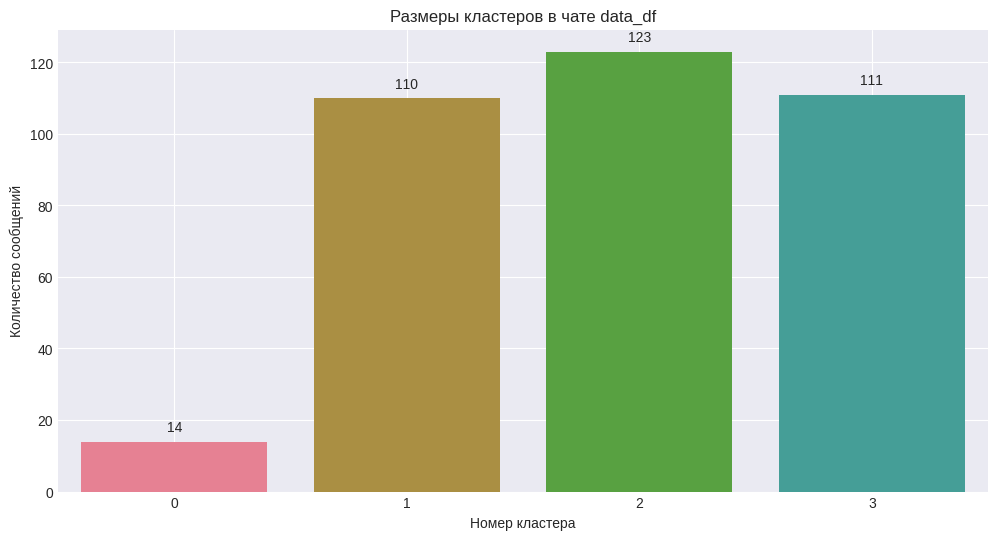

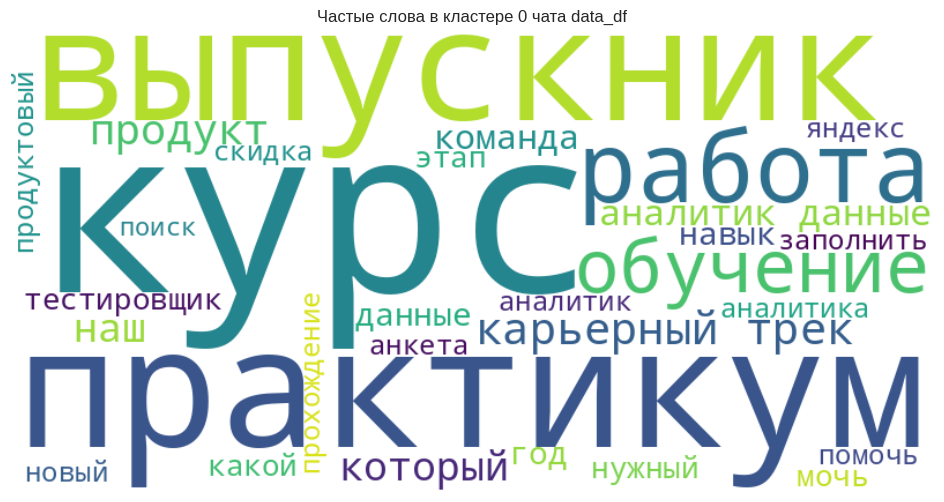

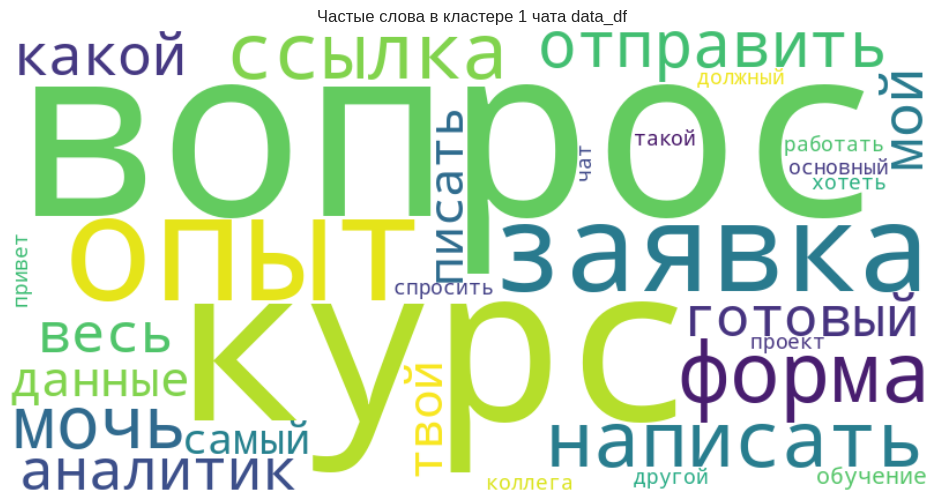

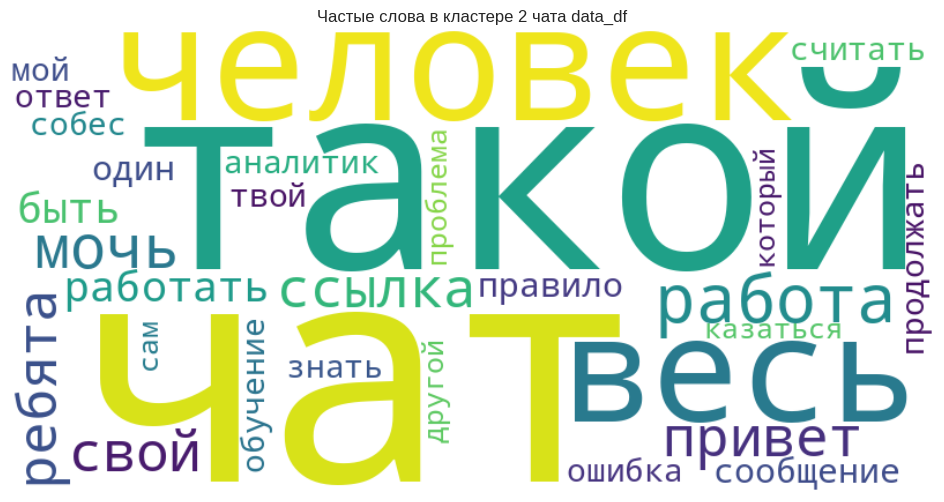

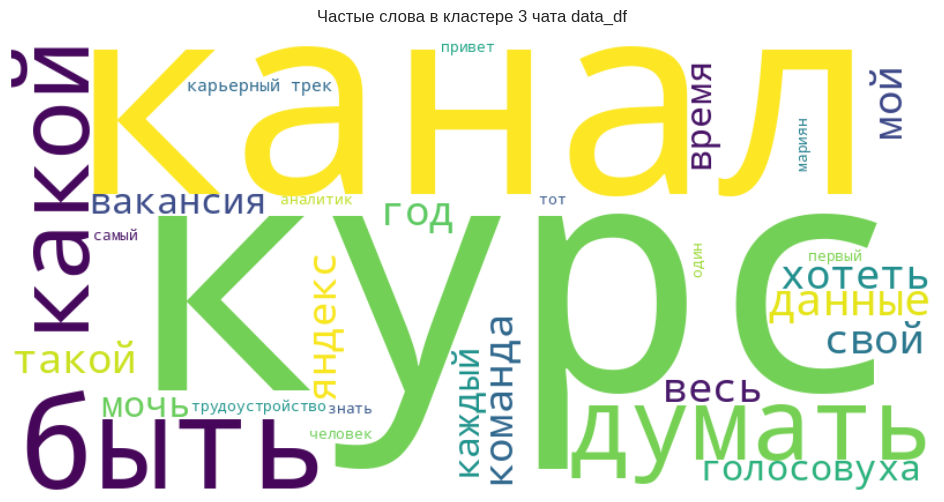

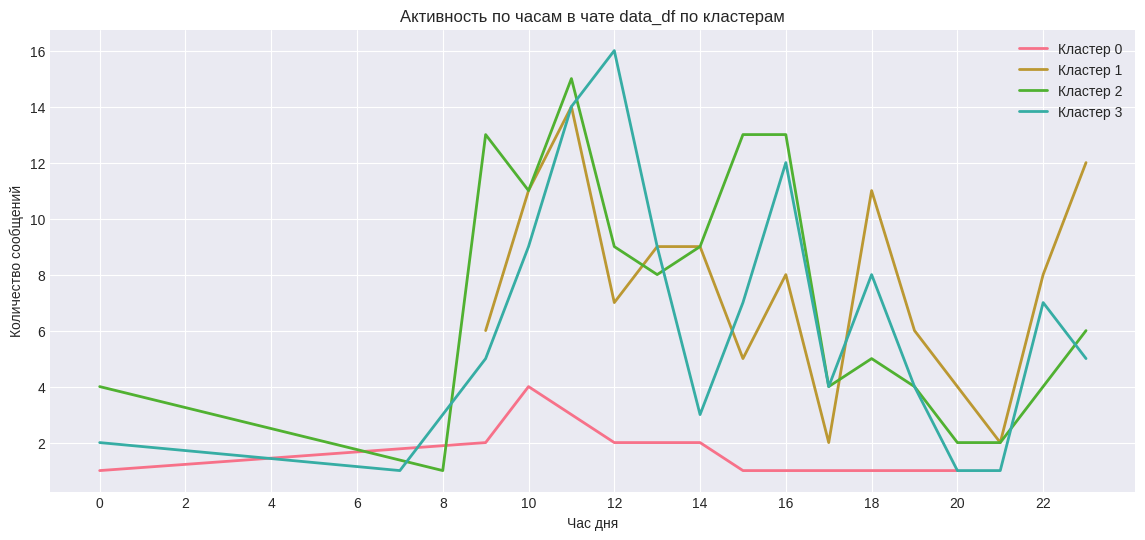


Детальная статистика по кластерам для data_df:


count                 top_sender  hour_mean day_most_active  \
cluster                                                                
2          123           Мариян Умагалова      13.68          Monday   
3          111             Andrey Novikov      14.11          Monday   
1          110  Arsen (არსენა) Хабибуллин      15.35         Tuesday   
0           14      DATA ALUMNI PRACTICUM      11.64        Thursday   

         reply_count            date_min            date_max  reply_percent  \
cluster                                                                       
2                 93 2025-02-03 11:28:38 2025-02-27 22:33:36          75.60   
3                 81 2025-02-03 11:52:20 2025-02-27 18:27:05          73.00   
1                 81 2025-02-03 12:17:25 2025-02-27 14:11:43          73.60   
0                  4 2025-02-04 10:51:10 2025-02-27 20:01:03          28.60   

         days_covered                                     top_words  percent  
cluster                                                                       
2                  25              [чат, такой, работа, весь, свой]    34.40  
3                  25              [быть, курс, какой, такой, свой]    31.00  
1                  25             [вопрос, курс, ссылка, мочь, мой]    30.70  
0                  24  [практикум, работа, курс, карьерный, данные]     3.90


############################################################
###<div class='alert alert-info'>
###<font color='Black' size=+1> **Итоговый вывод** <br>
По результатам кластеризации выявлены следующие тематические кластеры:
1. Кластер 2: 123 сообщений (34.4%) (25 дней)
Топ-слова: чат, такой, работа, весь, свой
Самый активный отправитель: Мариян Умагалова
Процент ответов: 75.6%
------------------------------------------------------------
2. Кластер 3: 111 сообщений (31.0%) (25 дней)
Топ-слова: быть, курс, какой, такой, свой
Самый активный отправитель: Andrey Novikov
Процент ответов: 73.0%
------------------------------------------------------------
3. Кластер 1: 110 сообщений (30.7%) (25 дней)
Топ-слова: вопрос, курс, ссылка, мочь, мой
Самый активный отправитель: Arsen (არსენა) Хабибуллин
Процент ответов: 73.6%
------------------------------------------------------------
4. Кластер 0: 14 сообщений (3.9%) (24 дней)
Топ-слова: практикум, работа, курс, карьерный, данные
Самый активный отпра

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Оптимальное число кластеров: 9 (silhouette score: 0.06)


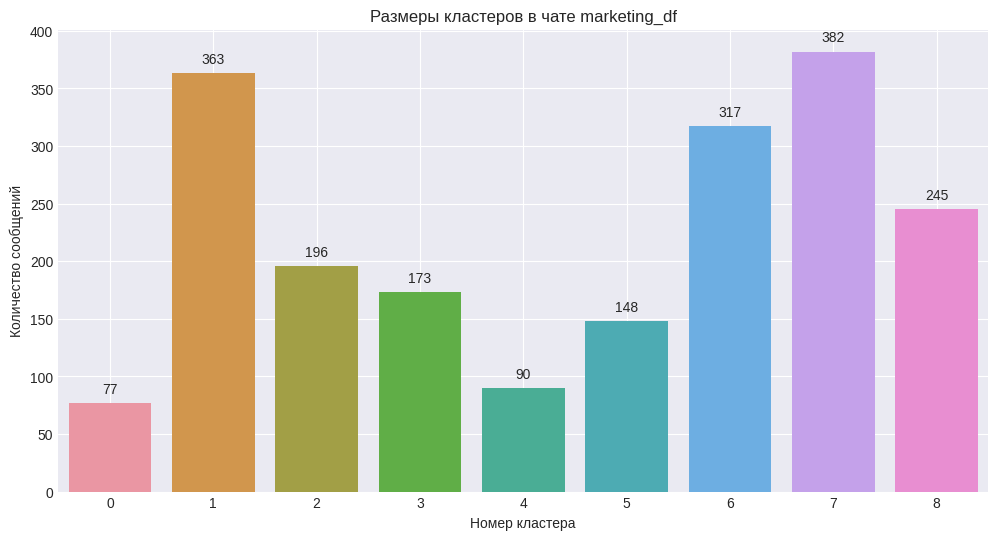

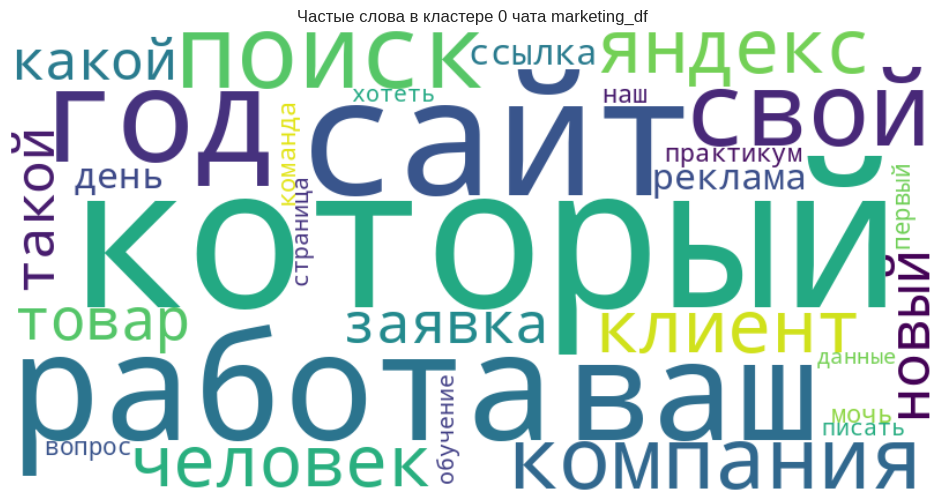

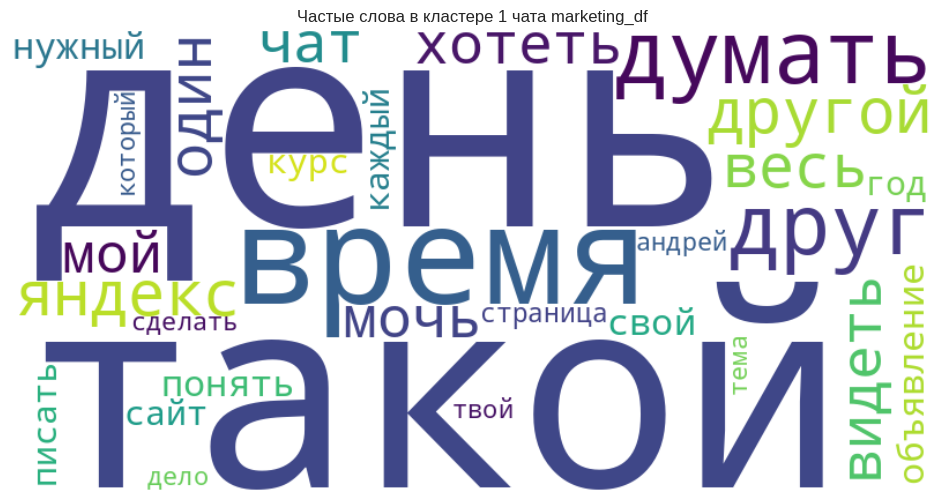

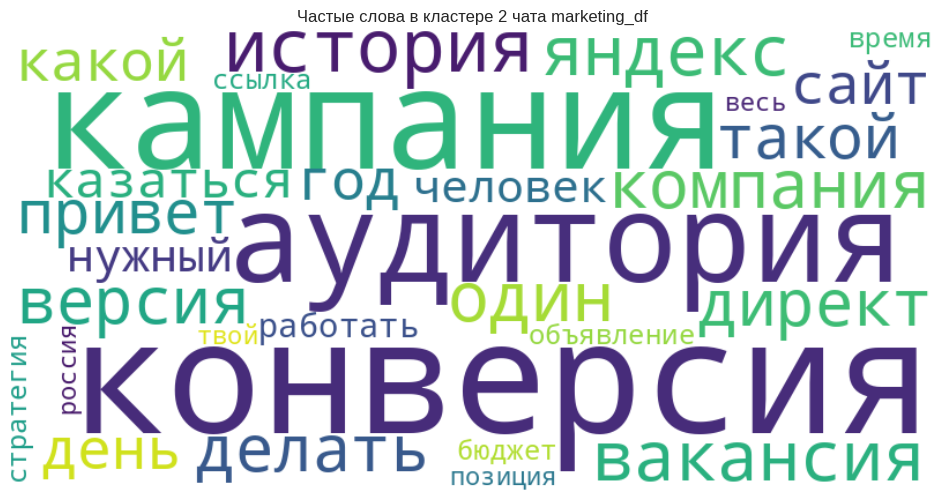

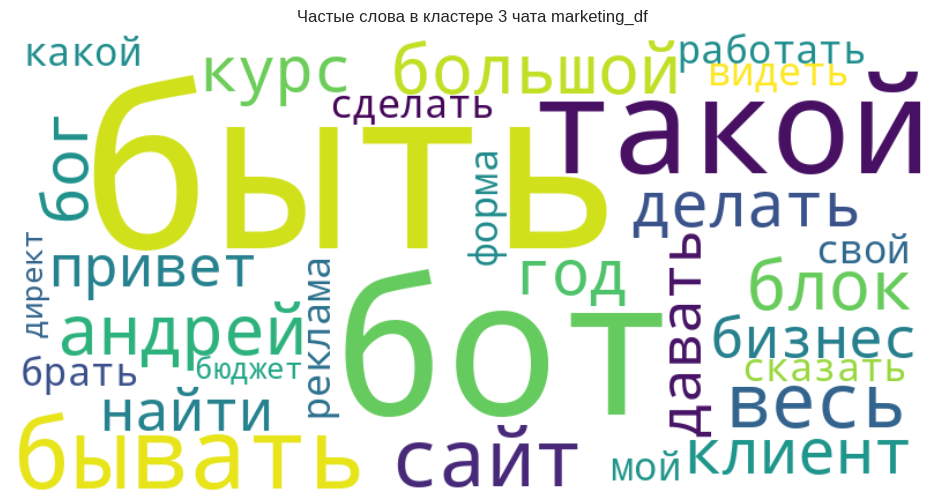

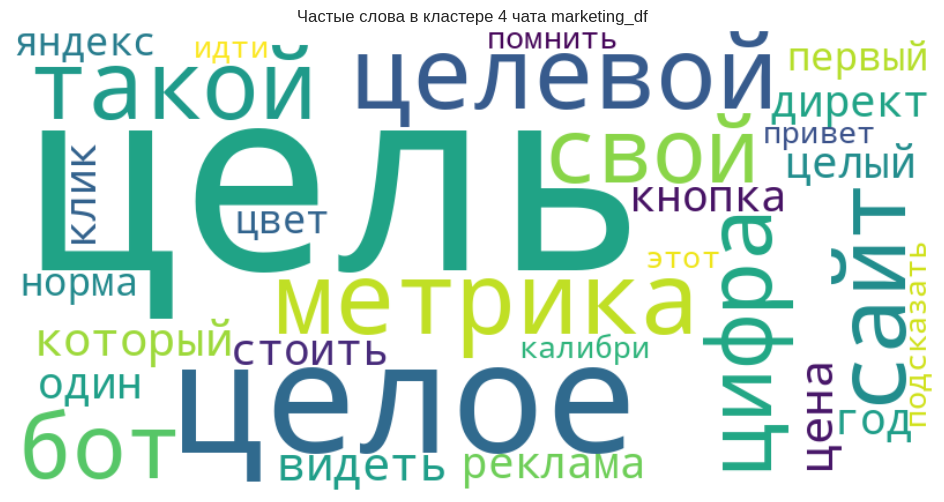

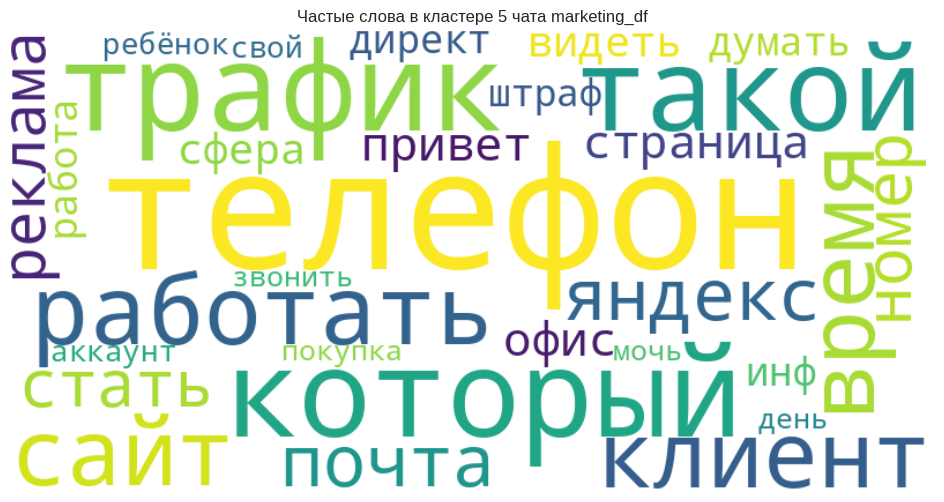

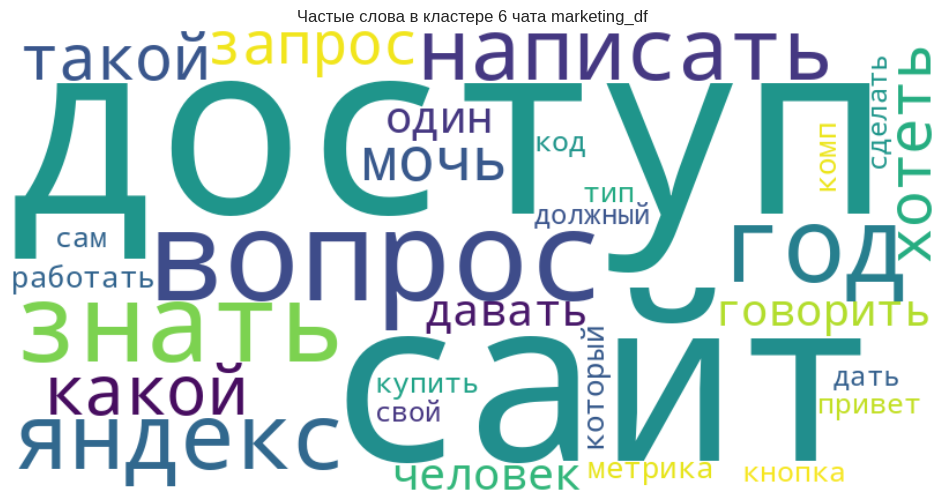

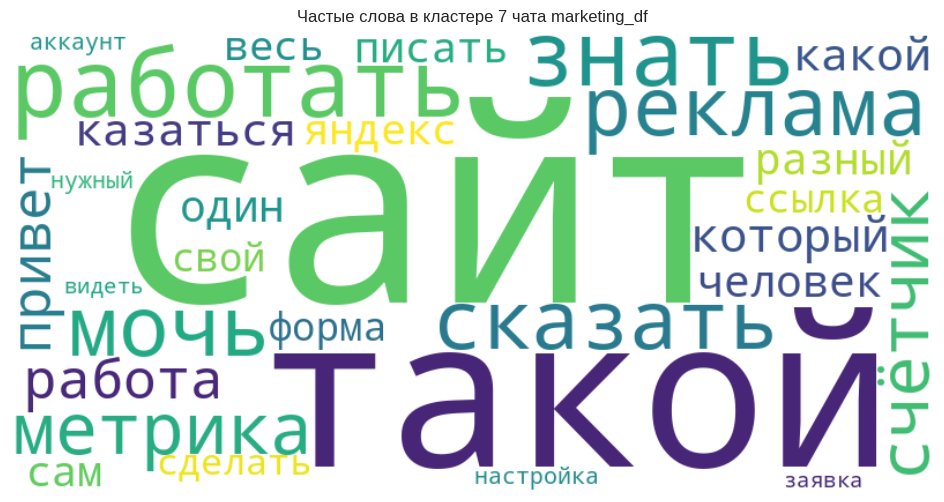

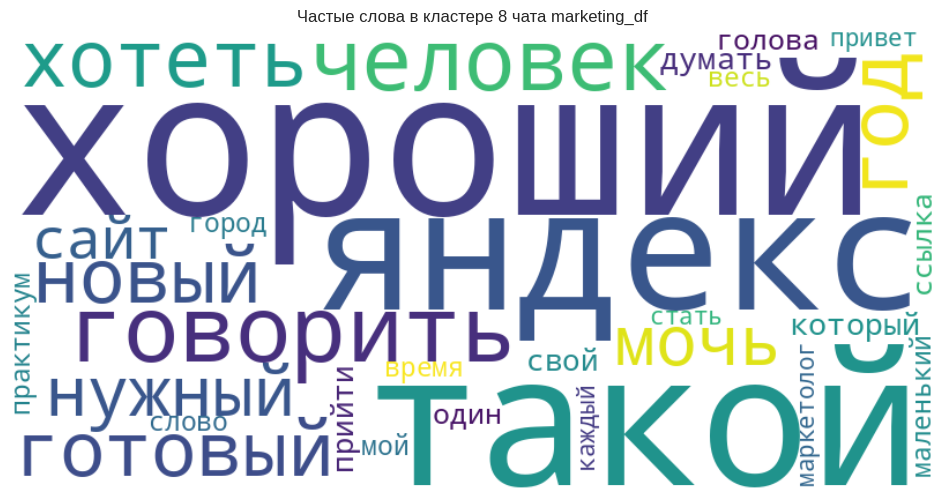

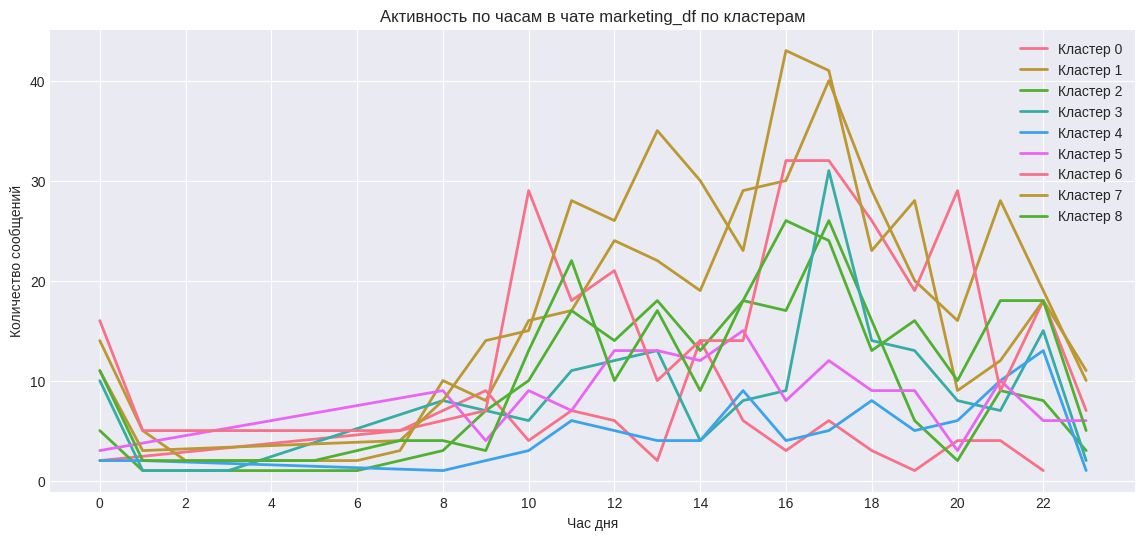


Детальная статистика по кластерам для marketing_df:


count       top_sender  hour_mean day_most_active  reply_count  \
cluster                                                                   
7          382  Андрей Дамаскин      14.72       Wednesday          229   
1          363   Pasha Sannikov      14.97       Wednesday          231   
6          317  Андрей Дамаскин      14.63       Wednesday          182   
8          245  Андрей Дамаскин      14.93       Wednesday          142   
2          196             Олег      14.48       Wednesday          118   
3          173   Pasha Sannikov      14.98       Wednesday          112   
5          148  Андрей Дамаскин      14.85       Wednesday           98   
4           90  Андрей Дамаскин      16.16          Sunday           49   
0           77   Pasha Sannikov      13.32       Wednesday           30   

                   date_min            date_max  reply_percent  days_covered  \
cluster                                                                        
7       2025-02-01 08:15:32 2025-02-27 18:46:41          59.90            27   
1       2025-02-01 07:40:03 2025-02-27 17:14:51          63.60            27   
6       2025-02-01 08:22:13 2025-02-27 20:30:53          57.40            27   
8       2025-02-01 08:50:27 2025-02-27 16:59:34          58.00            27   
2       2025-02-01 07:48:53 2025-02-27 18:12:04          60.20            27   
3       2025-02-01 08:20:39 2025-02-27 18:11:11          64.70            27   
5       2025-02-01 08:20:28 2025-02-27 19:02:35          66.20            27   
4       2025-02-01 08:26:50 2025-02-27 17:38:53          54.40            27   
0       2025-02-01 07:35:54 2025-02-27 20:23:08          39.00            27   

                                          top_words  percent  
cluster                                                       
7              [сайт, такой, работать, знать, мочь]    19.20  
1                [день, такой, время, один, яндекс]    18.20  
6                 [сайт, знать, яндекс, год, какой]    15.90  
8               [такой, яндекс, человек, год, мочь]    12.30  
2               [яндекс, один, день, привет, время]     9.80  
3                    [быть, такой, сайт, весь, год]     8.70  
5        [который, яндекс, такой, привет, работать]     7.40  
4             [такой, метрика, свой, который, сайт]     4.50  
0               [который, сайт, день, работа, свой]     3.90


############################################################
###<div class='alert alert-info'>
###<font color='Black' size=+1> **Итоговый вывод** <br>
По результатам кластеризации выявлены следующие тематические кластеры:
1. Кластер 7: 382 сообщений (19.2%) (27 дней)
Топ-слова: сайт, такой, работать, знать, мочь
Самый активный отправитель: Андрей Дамаскин
Процент ответов: 59.9%
------------------------------------------------------------
2. Кластер 1: 363 сообщений (18.2%) (27 дней)
Топ-слова: день, такой, время, один, яндекс
Самый активный отправитель: Pasha Sannikov
Процент ответов: 63.6%
------------------------------------------------------------
3. Кластер 6: 317 сообщений (15.9%) (27 дней)
Топ-слова: сайт, знать, яндекс, год, какой
Самый активный отправитель: Андрей Дамаскин
Процент ответов: 57.4%
------------------------------------------------------------
4. Кластер 8: 245 сообщений (12.3%) (27 дней)
Топ-слова: такой, яндекс, человек, год, мочь
Самый активный отправитель: Андр

Batches:   0%|          | 0/35 [00:00<?, ?it/s]

Оптимальное число кластеров: 9 (silhouette score: 0.06)


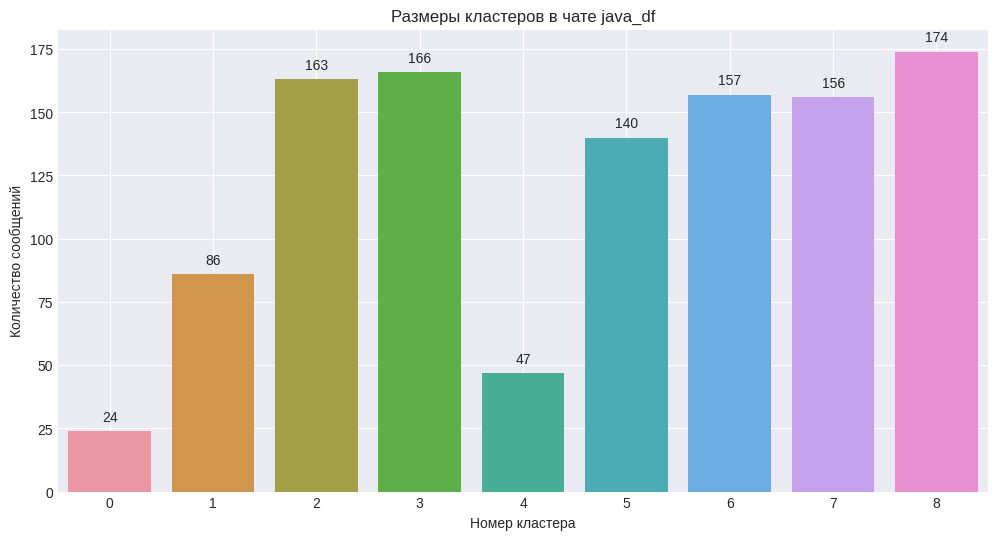

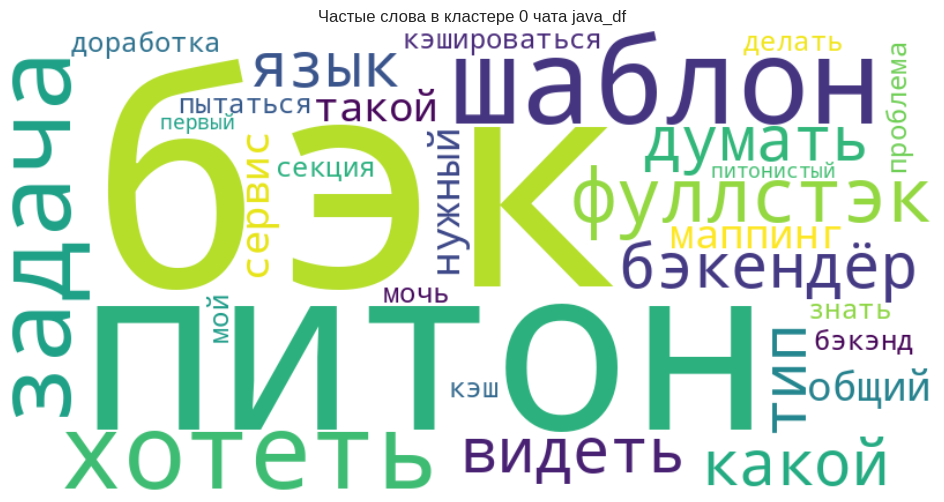

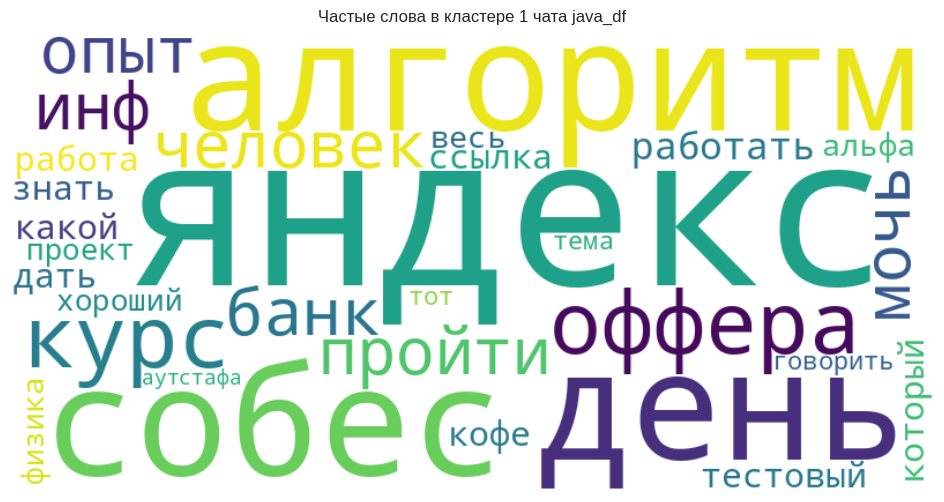

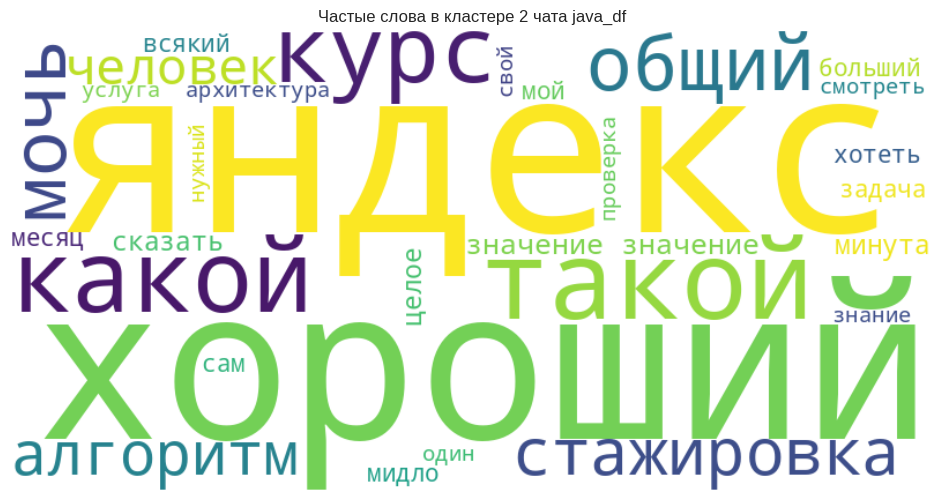

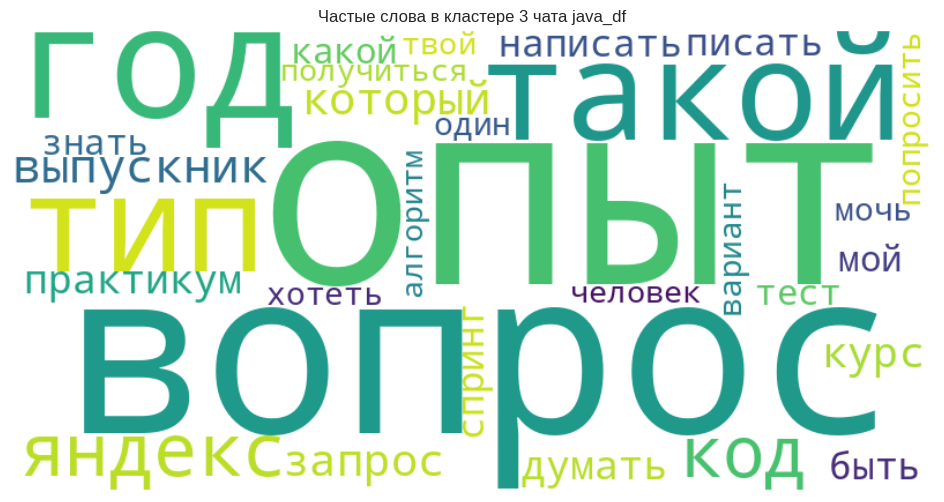

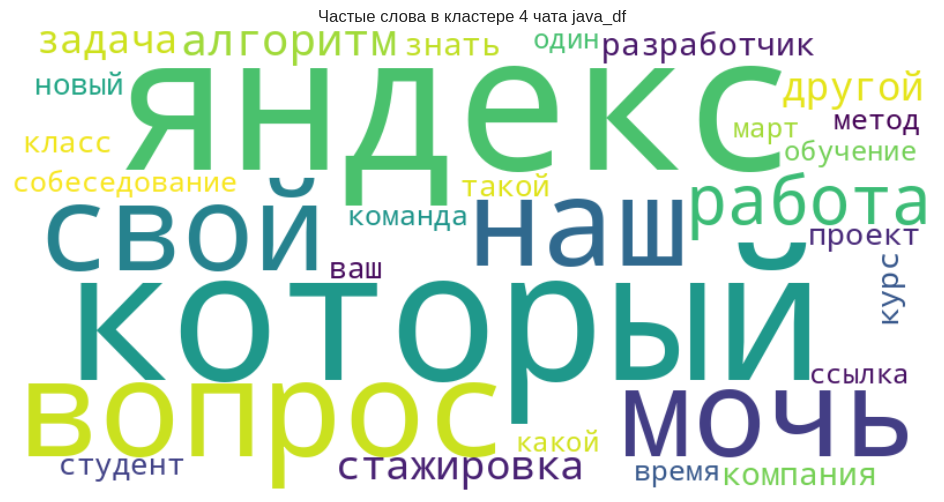

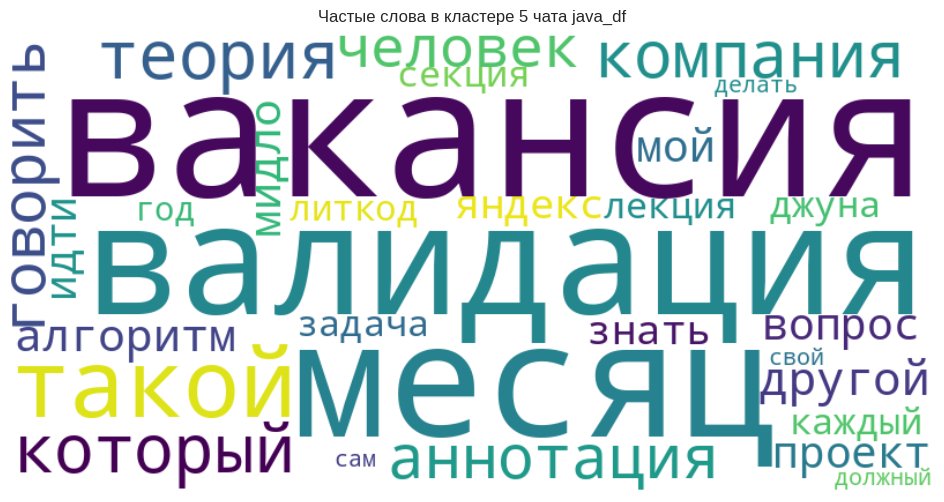

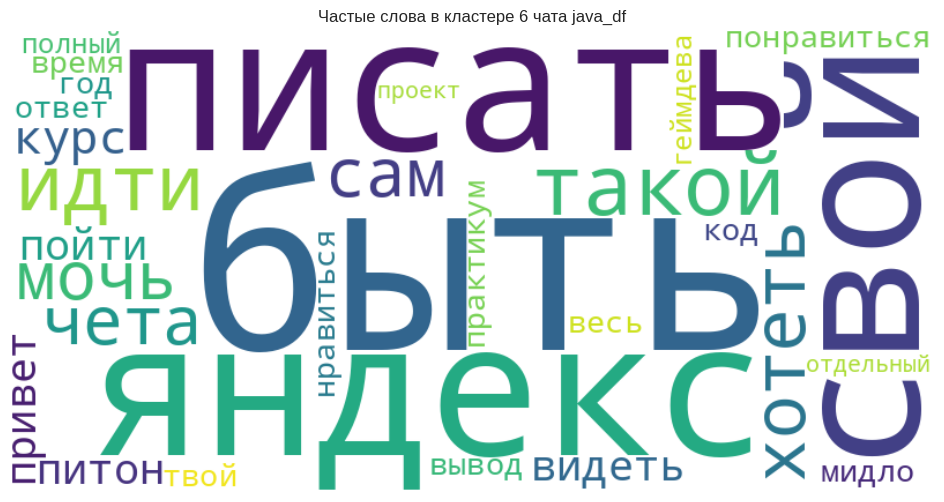

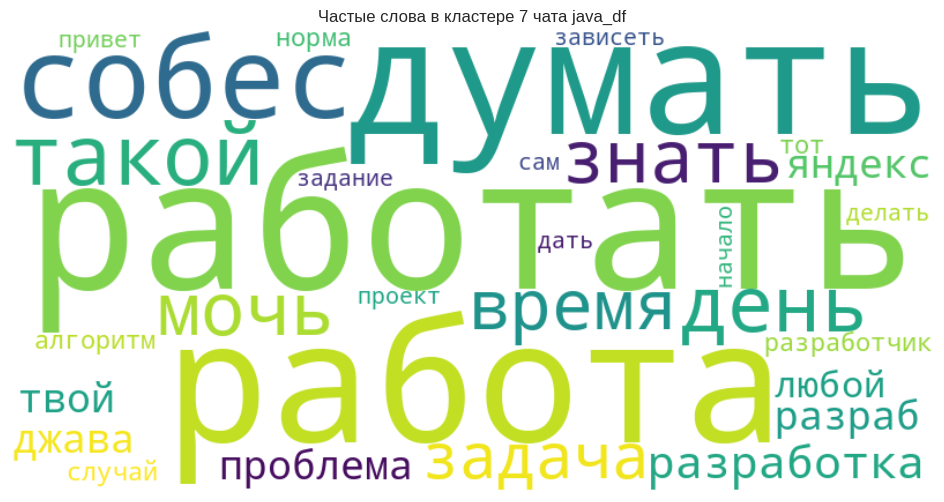

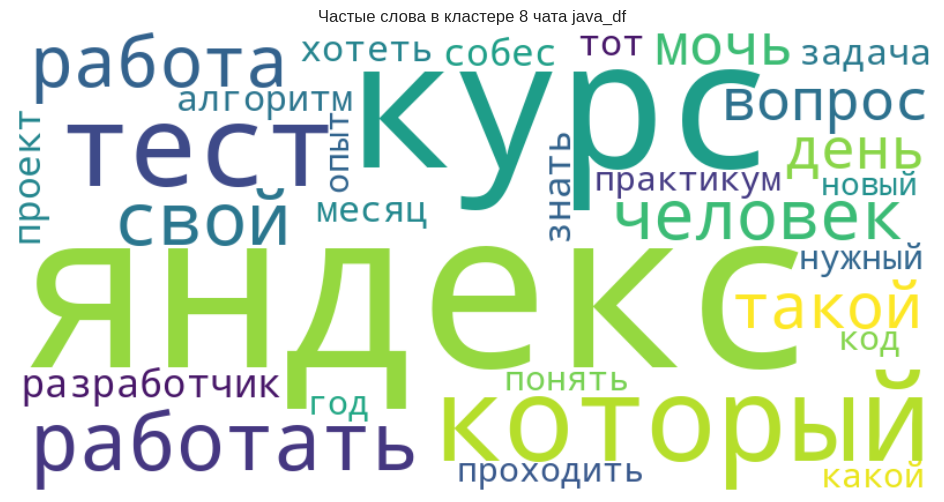

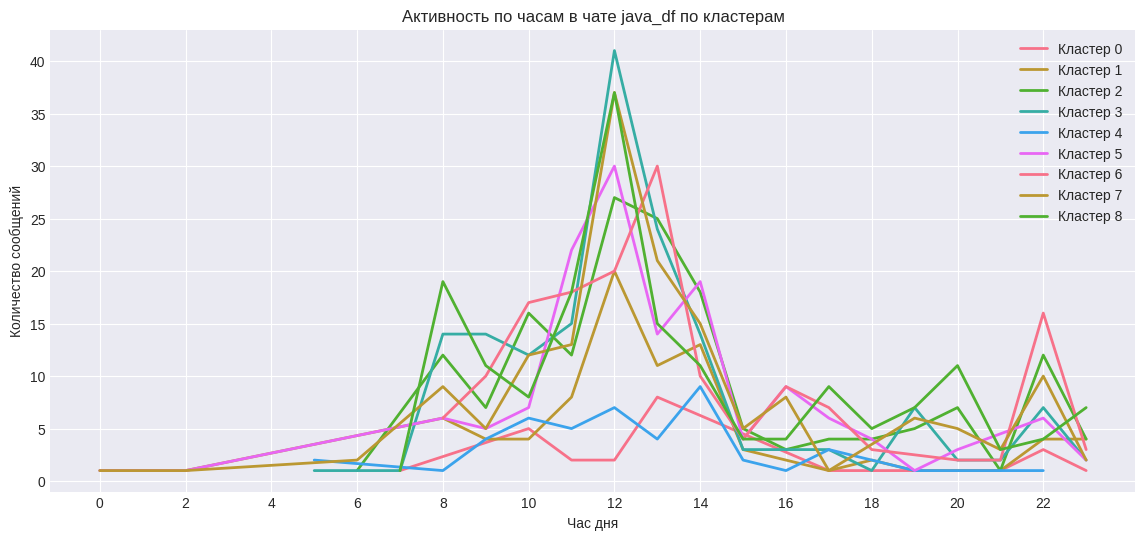


Детальная статистика по кластерам для java_df:


count top_sender  hour_mean day_most_active  reply_count  \
cluster                                                             
8          174      Игорь      13.57       Wednesday          106   
3          166      Игорь      12.72       Wednesday           95   
2          163      Игорь      13.70       Wednesday           89   
6          157      Игорь      13.73       Wednesday           89   
7          156      Игорь      13.36       Wednesday           76   
5          140      Игорь      13.21       Wednesday           89   
1           86      Игорь      13.13       Wednesday           48   
4           47      Игорь      12.53          Friday           20   
0           24      Игорь      13.92        Thursday           10   

                   date_min            date_max  reply_percent  days_covered  \
cluster                                                                        
8       2025-03-02 20:05:37 2025-03-28 23:28:29          60.90            27   
3       2025-03-03 11:20:34 2025-03-28 14:59:59          57.20            26   
2       2025-03-06 22:47:27 2025-03-28 23:24:31          54.60            23   
6       2025-03-03 11:18:39 2025-03-28 15:07:58          56.70            26   
7       2025-03-04 10:21:32 2025-03-28 12:42:19          48.70            25   
5       2025-03-03 11:18:40 2025-03-28 14:56:27          63.60            26   
1       2025-03-06 23:49:05 2025-03-28 23:30:13          55.80            22   
4       2025-03-03 17:35:56 2025-03-28 22:20:07          42.60            26   
0       2025-03-06 22:35:46 2025-03-28 12:36:57          41.70            22   

                                         top_words  percent  
cluster                                                      
8          [яндекс, курс, который, работать, тест]    15.60  
3               [опыт, вопрос, такой, год, яндекс]    14.90  
2               [яндекс, какой, такой, курс, мочь]    14.60  
6                [такой, яндекс, свой, мочь, курс]    14.10  
7           [работать, работа, такой, день, знать]    14.00  
5        [такой, человек, который, проект, вопрос]    12.60  
1            [яндекс, алгоритм, курс, мочь, знать]     7.70  
4            [который, свой, яндекс, мочь, вопрос]     4.20  
0            [задача, хотеть, знать, такой, какой]     2.20


############################################################
###<div class='alert alert-info'>
###<font color='Black' size=+1> **Итоговый вывод** <br>
По результатам кластеризации выявлены следующие тематические кластеры:
1. Кластер 8: 174 сообщений (15.6%) (27 дней)
Топ-слова: яндекс, курс, который, работать, тест
Самый активный отправитель: Игорь
Процент ответов: 60.9%
------------------------------------------------------------
2. Кластер 3: 166 сообщений (14.9%) (26 дней)
Топ-слова: опыт, вопрос, такой, год, яндекс
Самый активный отправитель: Игорь
Процент ответов: 57.2%
------------------------------------------------------------
3. Кластер 2: 163 сообщений (14.6%) (23 дней)
Топ-слова: яндекс, какой, такой, курс, мочь
Самый активный отправитель: Игорь
Процент ответов: 54.6%
------------------------------------------------------------
4. Кластер 6: 157 сообщений (14.1%) (26 дней)
Топ-слова: такой, яндекс, свой, мочь, курс
Самый активный отправитель: Игорь
Процент ответов: 56.7%
--

In [9]:
# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

def apply_clustering(df, chat_name):
    """Применяет эмбединги и кластеризацию к датасету чата с визуализацией"""
    if df is None or len(df) == 0:
        print(f"Нет данных для чата {chat_name}")
        return None
    
    # Фильтрация коротких сообщений
    filtered_df = df[df['purport_text'].str.split().str.len() >= 3].copy()
    
    if len(filtered_df) == 0:
        print(f"После фильтрации нет данных для чата {chat_name}")
        return None
    
    print(f"\nОбработка чата {chat_name} ({len(filtered_df)} сообщений после фильтрации)")
    
    # Генерация эмбеддингов
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(filtered_df['purport_text'].tolist())
    
    # Определение оптимального числа кластеров (от 2 до 10)
    silhouette_scores = []
    cluster_range = range(2, min(11, len(filtered_df)//2))  # Не более 10 кластеров
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)  # Установка n_init явно
        preds = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, preds)
        silhouette_scores.append((k, score))
    
    # Выбираем лучшее количество кластеров
    best_k, best_score = max(silhouette_scores, key=lambda x: x[1])
    print(f"Оптимальное число кластеров: {best_k} (silhouette score: {best_score:.2f})")
    
    # Финальная кластеризация
    clusterer = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10)
    labels = clusterer.fit_predict(embeddings)
    filtered_df['cluster'] = labels
    
    # UMAP проекция для визуализации
    reducer = umap.UMAP()  # Убрали random_state для предотвращения предупреждения
    umap_embeds = reducer.fit_transform(embeddings)
    filtered_df['umap_x'] = umap_embeds[:, 0]
    filtered_df['umap_y'] = umap_embeds[:, 1]
    
    # Подготовка данных для визуализации
    filtered_df['wrapped_text'] = filtered_df['text'].apply(lambda x: '<br>'.join(textwrap.wrap(x, width=60)))
    
    # Визуализация 1: Интерактивный scatter plot с исходными сообщениями
    fig = px.scatter(
        filtered_df, 
        x='umap_x', 
        y='umap_y', 
        color='cluster',
        hover_data=['wrapped_text', 'sender_name', 'date'],
        title=f'Кластеризация чата {chat_name} (UMAP проекция)',
        width=1000, 
        height=700
    )
    
    # Добавляем подписи кластеров
    cluster_centers = filtered_df.groupby('cluster')[['umap_x', 'umap_y']].mean()
    for cluster, (x, y) in cluster_centers.iterrows():
        fig.add_annotation(
            x=x, y=y,
            text=f"Кластер {cluster}",
            showarrow=True,
            arrowhead=1,
            ax=0, ay=-40,
            bgcolor="white",
            bordercolor="black"
        )
    
    # Добавляем эллипсы вокруг кластеров
    for cluster in filtered_df['cluster'].unique():
        cluster_data = filtered_df[filtered_df['cluster'] == cluster]
        fig.add_shape(
            type="circle",
            xref="x", yref="y",
            x0=cluster_data['umap_x'].min(),
            y0=cluster_data['umap_y'].min(),
            x1=cluster_data['umap_x'].max(),
            y1=cluster_data['umap_y'].max(),
            line_color="black",
            opacity=0.2
        )
    
    fig.update_traces(marker=dict(size=8, opacity=0.7))
    fig.show()
    
    # Визуализация 2: Размеры кластеров
    plt.figure(figsize=(12, 6))
    cluster_counts = filtered_df['cluster'].value_counts().sort_index()
    ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    
    # Добавляем аннотации с количеством сообщений
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    
    plt.title(f'Размеры кластеров в чате {chat_name}')
    plt.xlabel('Номер кластера')
    plt.ylabel('Количество сообщений')
    plt.grid(True)
    plt.show()
    
    # Визуализация 3: WordCloud для каждого кластера
    for cluster in sorted(filtered_df['cluster'].unique()):
        cluster_text = ' '.join(filtered_df[filtered_df['cluster'] == cluster]['purport_text'])
        if len(cluster_text) < 10:
            continue
            
        wordcloud = WordCloud(
            width=800, 
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=30
        ).generate(cluster_text)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Частые слова в кластере {cluster} чата {chat_name}')
        plt.axis('off')
        plt.show()
    
    # Анализ кластеров
    cluster_stats = filtered_df.groupby('cluster').agg({
        'text': 'count',
        'sender_name': lambda x: x.value_counts().index[0],
        'hour': 'mean',
        'day_of_week': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
        'reply_to_message_id': lambda x: x.notna().sum(),
        'date': ['min', 'max']
    })
    cluster_stats.columns = ['count', 'top_sender', 'hour_mean', 'day_most_active', 'reply_count', 'date_min', 'date_max']
    
    # Добавляем дополнительные метрики
    cluster_stats['reply_percent'] = (cluster_stats['reply_count'] / cluster_stats['count'] * 100).round(1)
    cluster_stats['days_covered'] = (cluster_stats['date_max'] - cluster_stats['date_min']).dt.days + 1
    
    # Получаем топ-слова для каждого кластера
    vectorizer = TfidfVectorizer(max_features=20)
    tfidf_matrix = vectorizer.fit_transform(filtered_df['purport_text'])
    feature_names = vectorizer.get_feature_names_out()
    
    cluster_top_words = {}
    for cluster in set(labels):
        cluster_docs = tfidf_matrix[filtered_df['cluster'] == cluster]
        if cluster_docs.shape[0] == 0:
            continue
        sum_scores = cluster_docs.sum(axis=0).A1
        top_indices = sum_scores.argsort()[-5:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        cluster_top_words[cluster] = top_words
    
    cluster_stats['top_words'] = cluster_stats.index.map(cluster_top_words)
    cluster_stats['percent'] = (cluster_stats['count'] / len(filtered_df) * 100).round(1)
    
    # Визуализация 4: Временные паттерны по кластерам
    plt.figure(figsize=(14, 6))
    for cluster in sorted(filtered_df['cluster'].unique()):
        cluster_data = filtered_df[filtered_df['cluster'] == cluster]
        hour_counts = cluster_data['hour'].value_counts().sort_index()
        plt.plot(hour_counts.index, hour_counts.values, 
                label=f'Кластер {cluster}', linewidth=2)
    
    plt.title(f'Активность по часам в чате {chat_name} по кластерам')
    plt.xlabel('Час дня')
    plt.ylabel('Количество сообщений')
    plt.xticks(range(0, 24, 2))  # Шаг по оси X = 2
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Вывод статистики по кластерам
    print(f"\nДетальная статистика по кластерам для {chat_name}:")
    display(cluster_stats.sort_values('count', ascending=False))
    
    # Формирование итогового вывода
    print("\n" + "#" * 60)
    print("###<div class='alert alert-info'>")
    print("###<font color='Black' size=+1> **Итоговый вывод** <br>")
    print("По результатам кластеризации выявлены следующие тематические кластеры:")
    
    sorted_clusters = cluster_stats.sort_values('count', ascending=False)
    for i, (cluster, row) in enumerate(sorted_clusters.iterrows(), 1):
        days = f"({row['days_covered']} дней)" if pd.notna(row['days_covered']) else ""
        print(f"{i}. Кластер {cluster}: {row['count']} сообщений ({row['percent']}%) {days}")
        print(f"Топ-слова: {', '.join(row['top_words'])}")
        print(f"Самый активный отправитель: {row['top_sender']}")
        print(f"Процент ответов: {row['reply_percent']}%")
        print("-"*60)
    
    print("#######################")
    
    return filtered_df

# Применяем кластеризацию к каждому обработанному датасету
print('\n' + '=' * 60)
print('РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ:')
print('=' * 60)

clustered_datasets = {}
for name, df in parsed_datasets.items():
    if df is not None:
        clustered_df = apply_clustering(df, name)
        if clustered_df is not None:
            clustered_datasets[name] = clustered_df

In [10]:
# проверка датасетов
# Выводим по 5 случайных строк для каждого датасета с колонкой cluster
print('\n' + '=' * 60)
print('ПРОСМОТР КЛАСТЕРИЗОВАННЫХ ДАННЫХ:')
print('=' * 60)

for name, df in clustered_datasets.items():
    print(f'\nЧат: {name}')
    print(f'Всего сообщений: {len(df)}')
    print(f'Количество кластеров: {df["cluster"].nunique()}')
    print('\nСлучайные 5 сообщений с метками кластеров:')
    display(df[['text', 'cluster', 'sender_name', 'date']].sample(SAMPLE_SIZE, random_state=RANDOM_STATE))
    print('-' * 80)


ПРОСМОТР КЛАСТЕРИЗОВАННЫХ ДАННЫХ:

Чат: data_df
Всего сообщений: 358
Количество кластеров: 4

Случайные 5 сообщений с метками кластеров:


text  cluster  \
403  Кто набирает больше всех очков в рейтинге скид...        2   
567  Наверное, нет смысла. Просто я раскадал губу, ...        3   
130  Удобно, я тоже буду смешивать какие люди и как...        3   
278  Заполняю форму с телефона, не знаю, как это пр...        1   
848      Так, потому и добренько, что Мариян ушла.. 🤌🏻        3   

               sender_name                date  
403         Andrey Novikov 2025-02-10 11:35:44  
567                 Руслан 2025-02-19 13:46:25  
130                 Sergey 2025-02-04 16:04:17  
278  Варя Чернова (Лесных) 2025-02-05 21:28:25  
848       Дмитрий Лукьянов 2025-02-24 15:51:30

--------------------------------------------------------------------------------

Чат: marketing_df
Всего сообщений: 1991
Количество кластеров: 9

Случайные 5 сообщений с метками кластеров:


text  cluster  \
2086    Хотя.. а айтишников не бывает любви. Вроде бы))        3   
901                                 Ладно, всем доброй)        1   
75    к твоим вопросам добавлю, как так вышло что им...        7   
620   Как узнать пользователей в оффлайн точке прода...        7   
2407  Я пробовал начать его смотреть. Очень давно. 1...        2   

               sender_name                date  
2086        Pasha Sannikov 2025-02-13 12:52:03  
901   Данилов | Маркетолог 2025-02-05 20:54:18  
75                 Дмитрий 2025-02-01 12:31:30  
620         Pasha Sannikov 2025-02-05 09:39:55  
2407        Pasha Sannikov 2025-02-17 06:40:31

--------------------------------------------------------------------------------

Чат: java_df
Всего сообщений: 1113
Количество кластеров: 9

Случайные 5 сообщений с метками кластеров:


text  cluster  \
354   главное, чтобы легенда не рухнула на испытател...        3   
214   Если видео длинное, придется подождать, но обы...        8   
1024  Будем считать что необходимость зайти на сайт ...        5   
291   Попробуй убрать две нижние галки Sync или лучш...        2   
965   Опять не понятно. Почему к себе в этот самый п...        3   

            sender_name                date  
354   Максим Скобленков 2025-03-20 11:05:05  
214     Аляксей Арцёмаў 2025-03-11 13:14:53  
1024              Игорь 2025-03-26 09:12:05  
291         Игорь Пушка 2025-03-18 13:01:21  
965            Ruslan R 2025-03-26 08:38:58

--------------------------------------------------------------------------------



Чат: data_df
Всего диалогов: 131

Топ-5 диалогов:


message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
3                    14             3 2025-02-03 11:57:36 2025-02-03 12:23:11   
25                   11             1 2025-02-05 21:24:42 2025-02-05 23:15:35   
98                   11             2 2025-02-24 10:48:56 2025-02-24 11:26:33   
18                   10             3 2025-02-04 16:10:46 2025-02-04 16:24:33   
20                    9             2 2025-02-04 17:57:47 2025-02-04 18:19:03   

          duration  
dialogue            
3            25.58  
25          110.88  
98           37.62  
18           13.78  
20           21.27

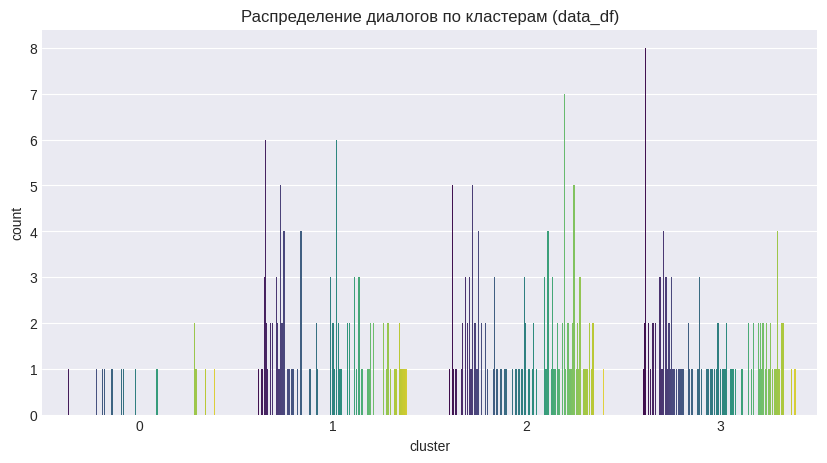


Пример сообщений из самого длинного диалога (ID: 3):


text       sender_name  \
4   Нужны голосовуки с эээ, нууу, и 10 секундными ...              Илья   
5   Звонили из ада, просили передать что ждут на м...   Aleksey Voronin   
6               Ты хотел сказать "ждут мастер-класс"?           Лиличка   
7   Их сделали, чтобы понравится человеку, котором...    Ваивода Кекзог   
8                             начала борьбу за призы)          Victoria   
9   До топ10 там далеко...\nНу и ребята  пока  не ...   Aleksey Voronin   
10                Не стоит благодарности, я хочу жить           Лиличка   
11  Надо сделать пост голосовалку, посмотреть, ест...  Мариян Умагалова   
12  Ну а что, думаешь мало таких, кто мои голосову...  Мариян Умагалова   
13  Окрепну немного как аналитик, и обязательно ис...  Мариян Умагалова   

                  date  cluster  
4  2025-02-03 11:57:36        3  
5  2025-02-03 11:58:06        3  
6  2025-02-03 11:59:48        3  
7  2025-02-03 11:59:53        2  
8  2025-02-03 12:04:32        2  
9  2025-02-03 12:04:34        2  
10 2025-02-03 12:06:56        3  
11 2025-02-03 12:14:45        2  
12 2025-02-03 12:15:23        3  
13 2025-02-03 12:17:25        1

--------------------------------------------------------------------------------

Чат: marketing_df
Всего диалогов: 859

Топ-5 диалогов:


message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
531                  14             5 2025-02-16 10:24:35 2025-02-16 11:08:06   
371                  13             7 2025-02-10 18:10:13 2025-02-10 18:18:34   
851                  13             8 2025-02-27 16:13:13 2025-02-27 16:45:57   
476                  12             6 2025-02-13 13:02:04 2025-02-13 14:55:38   
30                   12             3 2025-02-01 22:34:00 2025-02-01 22:48:16   

          duration  
dialogue            
531          43.52  
371           8.35  
851          32.73  
476         113.57  
30           14.27

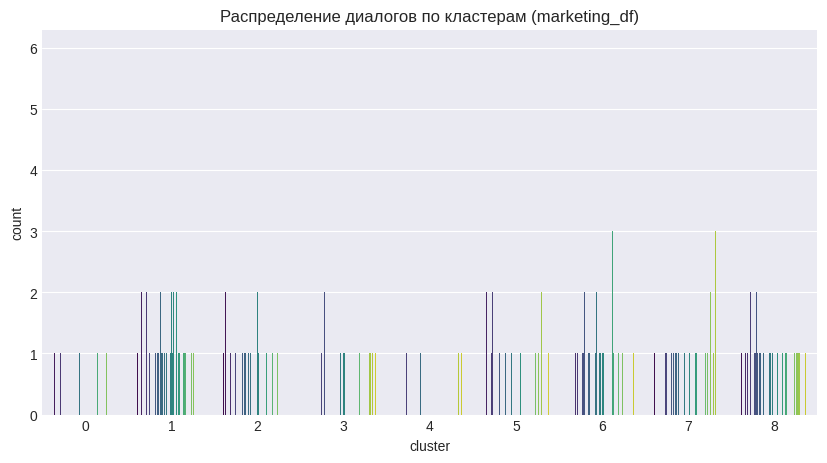


Пример сообщений из самого длинного диалога (ID: 531):


text     sender_name  \
1246  Всем привет. \nЗдесь есть кто специализируется...   Елена Авдеева   
1247             Привет. Рассылки - это спам сообщения?  Pasha Sannikov   
1248  Ну по телевизору тоже рекламу показывают. И на...   Елена Авдеева   
1249  Здесь люди ожидают увидеть рекламу. Понимают, ...  Pasha Sannikov   
1250  Думаю, Паша имеет в виду, что данный вид рекла...     Люба Редько   
1251  На емэйл не везде дают согласие. \nА в ТГ - ра...   Елена Авдеева   
1252  Тогда рядом постою))\n\nДали тут задачу тоже н...     Люба Редько   
1253          228 рублей стартер пак на русском сервере     Люба Редько   
1254  Люба, наверное, для таро тебе нужен другой Tel...  Pasha Sannikov   
1255  Сюрприиииз! 😂 маркетолог без упаковки и прогре...     Люба Редько   

                    date  cluster  
1246 2025-02-16 10:24:35        6  
1247 2025-02-16 10:25:26        7  
1248 2025-02-16 10:27:01        7  
1249 2025-02-16 10:31:02        6  
1250 2025-02-16 10:31:49        5  
1251 2025-02-16 10:33:20        2  
1252 2025-02-16 10:35:55        7  
1253 2025-02-16 10:44:46        8  
1254 2025-02-16 10:48:38        5  
1255 2025-02-16 10:49:43        8

--------------------------------------------------------------------------------

Чат: java_df
Всего диалогов: 520

Топ-5 диалогов:


message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
269                  19             8 2025-03-26 08:35:12 2025-03-26 08:46:38   
214                  19             2 2025-03-23 17:30:11 2025-03-23 18:59:32   
211                  14             5 2025-03-23 16:56:38 2025-03-23 17:08:52   
493                  13             2 2025-03-28 11:14:53 2025-03-28 11:29:31   
261                  11             3 2025-03-26 07:44:09 2025-03-26 08:18:39   

          duration  
dialogue            
269          11.43  
214          89.35  
211          12.23  
493          14.63  
261          34.50

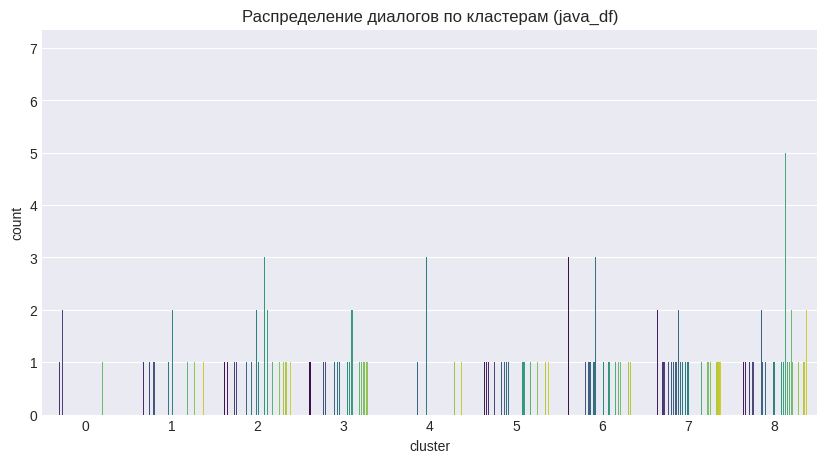


Пример сообщений из самого длинного диалога (ID: 269):


text      sender_name  \
530  Причем на курсе не дают то что пригодится для ...  Евгений Фоменко   
531  Я ничего не хочу и не предлагаю ничего ломать ...         Ruslan R   
532  Ты прав, карьерный трек мне не так сильно нуже...  Andrei Kuniutka   
533  Подбирает яндекс практикум чтобы увеличить "ко...            Игорь   
534  Не уборщик 😄 Но и не разработчик, скорее менед...  Andrei Kuniutka   
535  Не знаю, мне, чтобы попасть на стажировку, хва...  Andrei Kuniutka   
536  Опять не понятно. Почему к себе в этот самый п...         Ruslan R   
537   Это тебе Яндекс прислал, как выпускнику курса? 😉         Ruslan R   
538  Всмысле без привилегий, а просто типа го пробу...            Игорь   
539  Получается, что конверсию повышает за счёт дру...         Ruslan R   

                   date  cluster  
530 2025-03-26 08:35:12        8  
531 2025-03-26 08:35:42        8  
532 2025-03-26 08:36:46        8  
533 2025-03-26 08:37:09        8  
534 2025-03-26 08:37:30        7  
535 2025-03-26 08:38:21        7  
536 2025-03-26 08:38:58        3  
537 2025-03-26 08:39:19        3  
538 2025-03-26 08:39:58        5  
539 2025-03-26 08:40:09        5

--------------------------------------------------------------------------------

Чат: data_df
Всего сообщений: 358
Количество кластеров: 4
Количество диалогов: 131

Случайные 5 сообщений с метками кластеров и диалогов:


date   date_only time_only              chat_name  \
140 2025-02-10 11:35:44  2025-02-10  11:35:44  💬 Data Practicum Chat   
188 2025-02-19 13:46:25  2025-02-19  13:46:25  💬 Data Practicum Chat   
54  2025-02-04 16:04:17  2025-02-04  16:04:17  💬 Data Practicum Chat   
105 2025-02-05 21:28:25  2025-02-05  21:28:25  💬 Data Practicum Chat   
293 2025-02-24 15:51:30  2025-02-24  15:51:30  💬 Data Practicum Chat   

        chat_id       sender_id            sender_name  \
140  1379846874   user295904416         Andrey Novikov   
188  1379846874  user1274871390                 Руслан   
54   1379846874    user60031833                 Sergey   
105  1379846874   user103493538  Варя Чернова (Лесных)   
293  1379846874  user5459178210       Дмитрий Лукьянов   

                                                  text  \
140  Кто набирает больше всех очков в рейтинге скид...   
188  Наверное, нет смысла. Просто я раскадал губу, ...   
54   Удобно, я тоже буду смешивать какие люди и как...   
105  Заполняю форму с телефона, не знаю, как это пр...   
293      Так, потому и добренько, что Мариян ушла.. 🤌🏻   

                                          cleaned_text  \
140             набирает очков рейтинге скидывает нюдс   
188  наверное смысла просто раскадал губу скидка лю...   
54   удобно буду смешивать какие люди дела вопрос с...   
105         заполняю форму телефона знаю это применить   
293                              добренько мариян ушла   

                                          purport_text  reply_to_message_id  \
140               набирать очко рейтинг скидывать нюдс            267143.00   
188  смысл раскадать губа скидка любой первый заказ...            267356.00   
54                      быть какой человек дело вопрос            266828.00   
105                      заполнять форма телефон знать            266982.00   
293                               добренек мариян уйти            267663.00   

                                             reactions  hour day_of_week  \
140  [{'type': 'emoji', 'count': 1, 'emoji': '👍', '...    11      Monday   
188                                                 []    13   Wednesday   
54                                                  []    16     Tuesday   
105  [{'type': 'emoji', 'count': 1, 'emoji': '😁', '...    21   Wednesday   
293                                                 []    15      Monday   

     cluster  umap_x  umap_y  \
140        2   12.00    0.72   
188        3   13.97    2.77   
54         3   13.01    4.12   
105        1   15.93    2.66   
293        3   11.27    1.76   

                                          wrapped_text  dialogue  
140  Кто набирает больше всех очков в рейтинге скид...        39  
188  Наверное, нет смысла. Просто я раскадал губу, ...        64  
54   Удобно, я тоже буду смешивать какие люди и как...        15  
105  Заполняю форму с телефона, не знаю, как это пр...        25  
293      Так, потому и добренько, что Мариян ушла.. 🤌🏻       105

--------------------------------------------------------------------------------

Чат: marketing_df
Всего сообщений: 1991
Количество кластеров: 9
Количество диалогов: 859

Случайные 5 сообщений с метками кластеров и диалогов:


date   date_only time_only                   chat_name  \
1121 2025-02-13 12:52:03  2025-02-13  12:52:03  💬 Marketing Practicum Chat   
458  2025-02-05 20:54:18  2025-02-05  20:54:18  💬 Marketing Practicum Chat   
43   2025-02-01 12:31:30  2025-02-01  12:31:30  💬 Marketing Practicum Chat   
315  2025-02-05 09:39:55  2025-02-05  09:39:55  💬 Marketing Practicum Chat   
1308 2025-02-17 06:40:31  2025-02-17  06:40:31  💬 Marketing Practicum Chat   

         chat_id       sender_id           sender_name  \
1121  1782474569  user1272493086        Pasha Sannikov   
458   1782474569  user1164775873  Данилов | Маркетолог   
43    1782474569  user1018293452               Дмитрий   
315   1782474569  user1272493086        Pasha Sannikov   
1308  1782474569  user1272493086        Pasha Sannikov   

                                                   text  \
1121    Хотя.. а айтишников не бывает любви. Вроде бы))   
458                                 Ладно, всем доброй)   
43    к твоим вопросам добавлю, как так вышло что им...   
315   Как узнать пользователей в оффлайн точке прода...   
1308  Я пробовал начать его смотреть. Очень давно. 1...   

                                           cleaned_text  \
1121                 хотя айтишников бывает любви вроде   
458                                   ладно всем доброй   
43    твоим вопросам добавлю вышло имея советах прог...   
315   узнать пользователей оффлайн точке продаж кото...   
1308  пробовал начать смотреть очень давно серии пос...   

                                           purport_text  reply_to_message_id  \
1121                             айтишник бывать любовь                  NaN   
458                                  ладный весь добрый                  NaN   
43    твой вопрос добавить выйти совет программа мик...                  NaN   
315   пользователь точка продажа который прислать ре...             43119.00   
1308               пробовать серия посмотреть выдержать             45001.00   

     reactions  hour day_of_week  cluster  umap_x  umap_y  \
1121        []    12    Thursday        3   -1.03    8.54   
458         []    20   Wednesday        1   -1.23    8.97   
43          []    12    Saturday        7    0.33    6.05   
315         []     9   Wednesday        7   -2.45    8.33   
1308        []     6      Monday        2   -2.04    5.41   

                                           wrapped_text  dialogue  
1121    Хотя.. а айтишников не бывает любви. Вроде бы))       473  
458                                 Ладно, всем доброй)       197  
43    к твоим вопросам добавлю, как так вышло что им...        20  
315   Как узнать пользователей в оффлайн точке прода...       140  
1308  Я пробовал начать его смотреть. Очень давно. 1...       545

--------------------------------------------------------------------------------

Чат: java_df
Всего сообщений: 1113
Количество кластеров: 9
Количество диалогов: 520

Случайные 5 сообщений с метками кластеров и диалогов:


date   date_only time_only  \
186 2025-03-20 11:05:05  2025-03-20  11:05:05   
109 2025-03-11 13:14:53  2025-03-11  13:14:53   
582 2025-03-26 09:12:05  2025-03-26  09:12:05   
148 2025-03-18 13:01:21  2025-03-18  13:01:21   
536 2025-03-26 08:38:58  2025-03-26  08:38:58   

                                  chat_name     chat_id       sender_id  \
186  Java-developer 💬 Chat Alumni Practicum  1727450186  user5080339107   
109  Java-developer 💬 Chat Alumni Practicum  1727450186   user529858680   
582  Java-developer 💬 Chat Alumni Practicum  1727450186  user1298548871   
148  Java-developer 💬 Chat Alumni Practicum  1727450186   user702531935   
536  Java-developer 💬 Chat Alumni Practicum  1727450186   user238886336   

           sender_name                                               text  \
186  Максим Скобленков  главное, чтобы легенда не рухнула на испытател...   
109    Аляксей Арцёмаў  Если видео длинное, придется подождать, но обы...   
582              Игорь  Будем считать что необходимость зайти на сайт ...   
148        Игорь Пушка  Попробуй убрать две нижние галки Sync или лучш...   
536           Ruslan R  Опять не понятно. Почему к себе в этот самый п...   

                                          cleaned_text  \
186        главное легенда рухнула испытательном сроке   
109  видео длинное придется подождать обычно резуль...   
582  будем считать необходимость зайти сайт раза кл...   
148  попробуй убрать две нижние галки sync очереди ...   
536  понятно почему самый процесс загоняет брал вып...   

                                          purport_text  reply_to_message_id  \
186         главное легенда рухнуть испытательный срок             25731.00   
109  видео длинный прийтись результат стоить общий ...             25519.00   
582  быть необходимость сайт раз отдельный секция п...             26443.00   
148       попробовать нижний галка очередь один другой                  NaN   
536  самый процесс загонять брать выпускник направл...             26386.00   

    reactions  hour day_of_week  cluster  umap_x  umap_y  \
186        []    11    Thursday        3    0.39    9.42   
109        []    13     Tuesday        8    2.88    9.93   
582        []     9   Wednesday        5    2.57    9.24   
148        []    13     Tuesday        2   -0.26    8.75   
536        []     8   Wednesday        3    2.67   11.50   

                                          wrapped_text  dialogue  
186  главное, чтобы легенда не рухнула на испытател...       124  
109  Если видео длинное, придется подождать, но обы...        76  
582  Будем считать что необходимость зайти на сайт ...       282  
148  Попробуй убрать две нижние галки Sync или лучш...       102  
536  Опять не понятно. Почему к себе в этот самый п...       269

--------------------------------------------------------------------------------


In [11]:
def mark_dialogues(df):
    """
    Маркирует диалоги в датафрейме согласно условиям:
    1. Новый день (00:00) - новый диалог
    2. Разрыв > 1 часа - новый диалог
    3. Ответ на предыдущее сообщение (reply_to_message_id) объединяет в один диалог
    4. Сообщения в пределах 45 секунд объединяются в один диалог
    """
    df = df.sort_values('date').reset_index(drop=True)
    df['dialogue'] = 1  # Инициализация колонки
    
    current_dialogue = 1
    prev_date = df.at[0, 'date']
    
    for i in range(1, len(df)):
        curr_date = df.at[i, 'date']
        time_diff = curr_date - prev_date
        
        # Условия для нового диалога
        new_day = curr_date.hour == 0 and curr_date.minute == 0
        time_gap = time_diff > timedelta(hours=1)
        is_reply = pd.notna(df.at[i, 'reply_to_message_id'])
        
        if new_day or time_gap or not is_reply:
            current_dialogue += 1
        
        df.at[i, 'dialogue'] = current_dialogue
        prev_date = curr_date
    
    return df

# Применяем функцию ко всем датасетам
for name, df in clustered_datasets.items():
    clustered_datasets[name] = mark_dialogues(df)

# Функция для анализа диалогов
def analyze_dialogues(df):
    dialogue_stats = df.groupby('dialogue').agg({
        'text': 'count',
        'cluster': lambda x: x.mode()[0] if not x.mode().empty else -1,
        'date': ['min', 'max']
    })
    dialogue_stats.columns = ['message_count', 'main_cluster', 'start_time', 'end_time']
    dialogue_stats['duration'] = (dialogue_stats['end_time'] - dialogue_stats['start_time']).dt.total_seconds() / 60
    return dialogue_stats.sort_values('message_count', ascending=False)

# Выводим результаты для каждого датасета
for name, df in clustered_datasets.items():
    print(f"\nЧат: {name}")
    print(f"Всего диалогов: {df['dialogue'].nunique()}")
    
    # Топ-5 диалогов по количеству сообщений
    dialogue_stats = analyze_dialogues(df)
    print("\nТоп-5 диалогов:")
    display(dialogue_stats.head(5))
    
    # Визуализация распределения диалогов по кластерам
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='cluster', hue='dialogue', palette='viridis')
    plt.title(f'Распределение диалогов по кластерам ({name})')
    plt.legend([], [], frameon=False)  # Убираем легенду для чистоты
    plt.show()
    
    # Пример сообщений из самого длинного диалога
    longest_dialogue = dialogue_stats.iloc[0].name
    print(f"\nПример сообщений из самого длинного диалога (ID: {longest_dialogue}):")
    display(df[df['dialogue'] == longest_dialogue][['text', 'sender_name', 'date', 'cluster']].head(10))
    print('-' * 80)

# Обновленная визуализация случайных сообщений с новыми колонками
for name, df in clustered_datasets.items():
    print(f'\nЧат: {name}')
    print(f'Всего сообщений: {len(df)}')
    print(f'Количество кластеров: {df["cluster"].nunique()}')
    print(f'Количество диалогов: {df["dialogue"].nunique()}')
    print('\nСлучайные 5 сообщений с метками кластеров и диалогов:')
    display(df.sample(SAMPLE_SIZE, random_state=RANDOM_STATE))
    print('-' * 80)

Причины разнородности кластеров в одном диалоге:
Тематическое развитие разговора:

- В ходе диалога тема может естественным образом меняться

Например, разговор начинается с технического вопроса (кластер 3), затем переходит к шуткам (кластер 2) и заканчивается организационными вопросами (кластер 1)

Разные участники дискуссии:

- Каждый участник может выражаться в своем стиле

- Один человек пишет формально (кластер 1), другой использует сленг (кластер 3)

Особенности алгоритма кластеризации:

- Кластеризация работает на уровне отдельных сообщений, а не диалогов

- Модель учитывает лексику, стиль, но не временную связь между сообщениями


################################################################################
ЧАТ: DATA_DF
Всего диалогов: 131
Самый длинный диалог: ID 3

Топ-5 диалогов по количеству сообщений:


message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
3                    14             3 2025-02-03 11:57:36 2025-02-03 12:23:11   
25                   11             1 2025-02-05 21:24:42 2025-02-05 23:15:35   
98                   11             2 2025-02-24 10:48:56 2025-02-24 11:26:33   
18                   10             3 2025-02-04 16:10:46 2025-02-04 16:24:33   
20                    9             2 2025-02-04 17:57:47 2025-02-04 18:19:03   

          unique_users  duration_min  
dialogue                              
3                    7         25.58  
25                   6        110.88  
98                   5         37.62  
18                   5         13.78  
20                   3         21.27


Анализ диалога 3:
Всего сообщений: 14
Участников: 7
Продолжительность: 25.6 минут
Основной кластер: 3

Распределение по кластерам:


cluster  messages  percentage
0        3         8       57.10
1        2         5       35.70
2        1         1        7.10

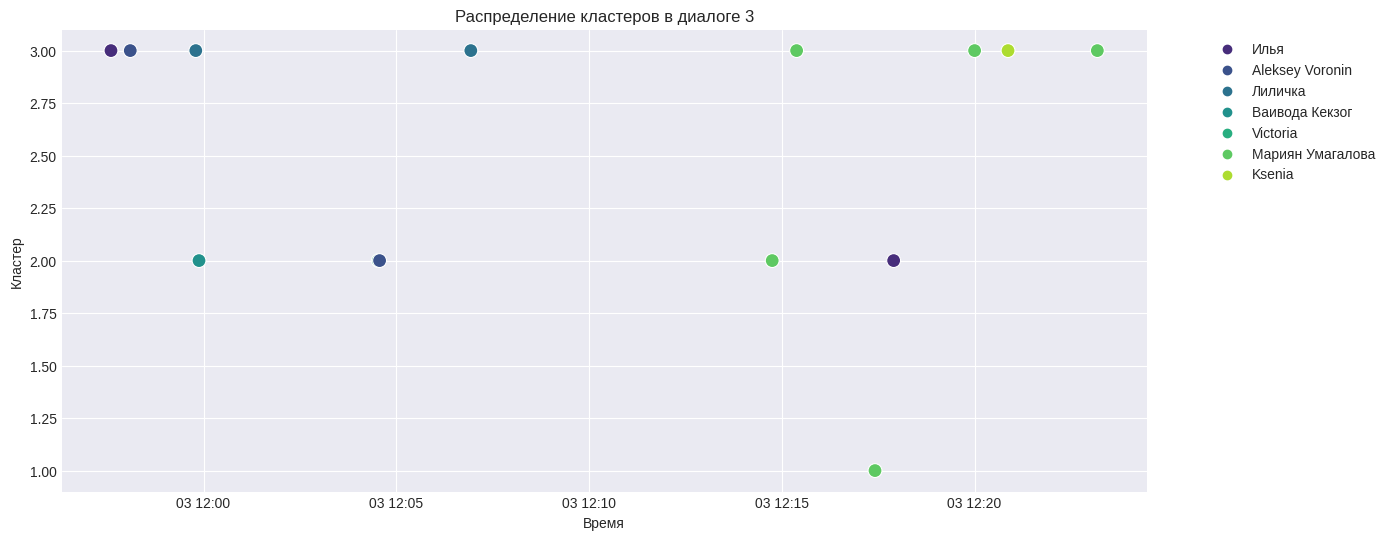


Содержание диалога:

КЛАСТЕР 3 (сообщений: 8)

11:57:36 | Илья:
Нужны голосовуки с эээ, нууу, и 10 секундными паузами
------------------------------------------------------------
11:58:06 | Aleksey Voronin:
Звонили из ада, просили передать что ждут на мастер-класс
------------------------------------------------------------
11:59:48 | Лиличка:
Ты хотел сказать "ждут мастер-класс"?
------------------------------------------------------------

КЛАСТЕР 2 (сообщений: 5)

11:59:53 | Ваивода Кекзог:
Их сделали, чтобы понравится человеку, которому отчитываются по созданию
стикеров)) конструктивная критика: вот вы бы сами стали их использовать на
постоянку?) тут же надо смотреть с позиции пользователя. Если бы они были с
котиками, то залетели бы сильно лучше.
------------------------------------------------------------
12:04:32 | Victoria:
начала борьбу за призы)
------------------------------------------------------------
12:04:34 | Aleksey Voronin:
До топ10 там далеко... Ну и ребята  пока  

message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
531                  14             5 2025-02-16 10:24:35 2025-02-16 11:08:06   
371                  13             7 2025-02-10 18:10:13 2025-02-10 18:18:34   
851                  13             8 2025-02-27 16:13:13 2025-02-27 16:45:57   
476                  12             6 2025-02-13 13:02:04 2025-02-13 14:55:38   
30                   12             3 2025-02-01 22:34:00 2025-02-01 22:48:16   

          unique_users  duration_min  
dialogue                              
531                  6         43.52  
371                  3          8.35  
851                  5         32.73  
476                  8        113.57  
30                   3         14.27


Анализ диалога 531:
Всего сообщений: 14
Участников: 6
Продолжительность: 43.5 минут
Основной кластер: 5

Распределение по кластерам:


cluster  messages  percentage
0        7         3       21.40
1        5         3       21.40
2        6         2       14.30
3        8         2       14.30
4        3         2       14.30
5        2         1        7.10
6        1         1        7.10

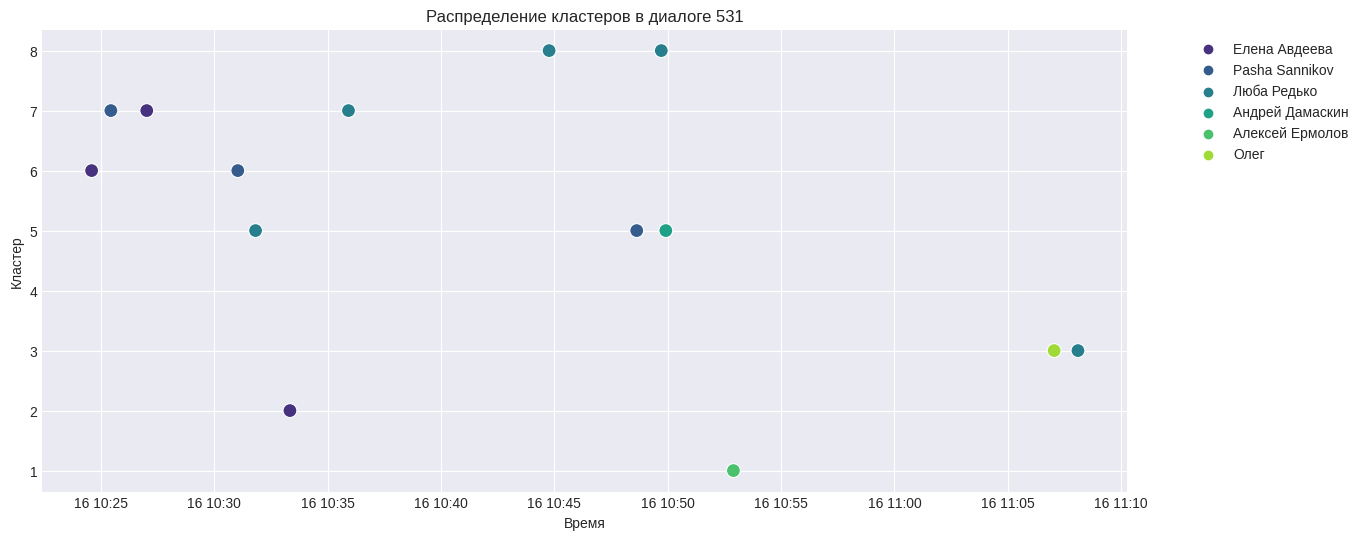


Содержание диалога:

КЛАСТЕР 6 (сообщений: 2)

10:24:35 | Елена Авдеева:
Всем привет.  Здесь есть кто специализируется по рассылкам и посевам в ТГ?
Напишите в личку. Буду признательна.
------------------------------------------------------------

КЛАСТЕР 7 (сообщений: 3)

10:25:26 | Pasha Sannikov:
Привет. Рассылки - это спам сообщения?
------------------------------------------------------------
10:27:01 | Елена Авдеева:
Ну по телевизору тоже рекламу показывают. И на сайтах. И в приложениях - прям
навязывают 🙂
------------------------------------------------------------

КЛАСТЕР 6 (сообщений: 2)

10:31:02 | Pasha Sannikov:
Здесь люди ожидают увидеть рекламу. Понимают, что она будет. На E-mail рассылки
сами дают согласие. А спам в телеграме - этот как спам звонки. Никто не читает,
но все запоминают распространителя. IMHO
------------------------------------------------------------

КЛАСТЕР 5 (сообщений: 3)

10:31:49 | Люба Редько:
Думаю, Паша имеет в виду, что данный вид рекламы наруш

message_count  main_cluster          start_time            end_time  \
dialogue                                                                        
269                  19             8 2025-03-26 08:35:12 2025-03-26 08:46:38   
214                  19             2 2025-03-23 17:30:11 2025-03-23 18:59:32   
211                  14             5 2025-03-23 16:56:38 2025-03-23 17:08:52   
493                  13             2 2025-03-28 11:14:53 2025-03-28 11:29:31   
261                  11             3 2025-03-26 07:44:09 2025-03-26 08:18:39   

          unique_users  duration_min  
dialogue                              
269                  4         11.43  
214                  4         89.35  
211                  5         12.23  
493                  5         14.63  
261                  5         34.50


Анализ диалога 269:
Всего сообщений: 19
Участников: 4
Продолжительность: 11.4 минут
Основной кластер: 8

Распределение по кластерам:


cluster  messages  percentage
0        8         7       36.80
1        3         5       26.30
2        5         3       15.80
3        7         2       10.50
4        2         1        5.30
5        1         1        5.30

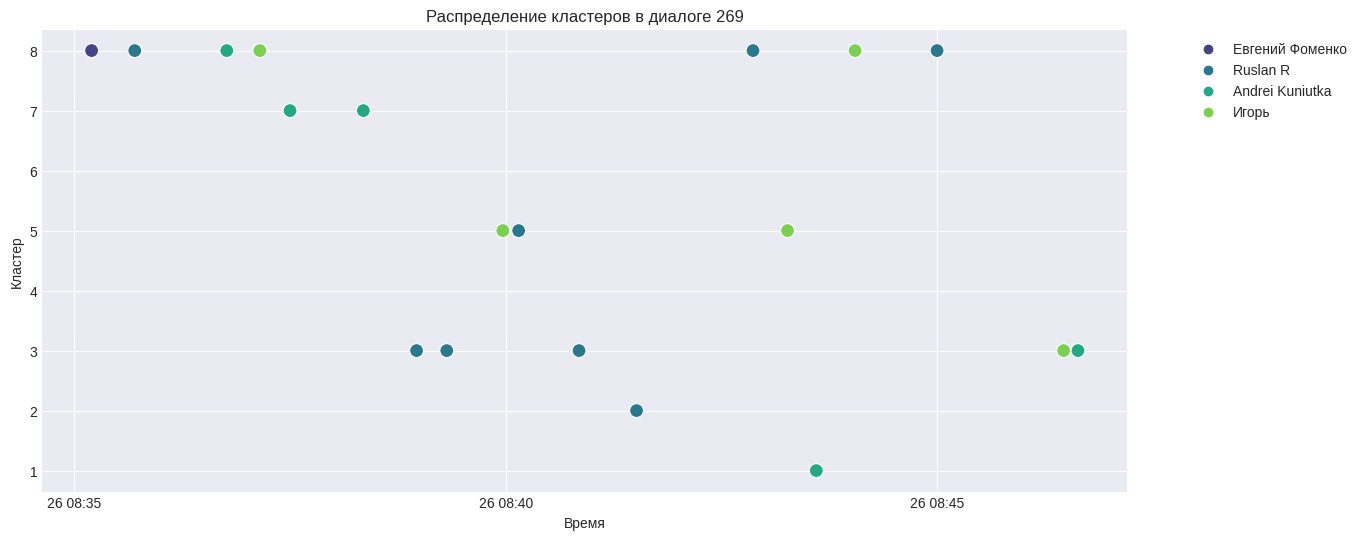


Содержание диалога:

КЛАСТЕР 8 (сообщений: 7)

08:35:12 | Евгений Фоменко:
Причем на курсе не дают то что пригодится для подготовки к собеседованию
------------------------------------------------------------
08:35:42 | Ruslan R:
Я ничего не хочу и не предлагаю ничего ломать в подборах Яндекс. Почитайте мой
вопрос. Я говорю о сервисе подбора джунов и стажёров. Вопрос: почему их Яндекс
себе не забирает, а бесплатно подбирает для других?
------------------------------------------------------------
08:36:46 | Andrei Kuniutka:
Ты прав, карьерный трек мне не так сильно нужен — в мои 40+ 😄 Но я в любом
случае планирую послушать, какие могут быть тонкости при трудойстройстве именно
в IT.
------------------------------------------------------------
08:37:09 | Игорь:
Подбирает яндекс практикум чтобы увеличить "конверсию" и быть более успешными на
рынке - тут взаимовыгодная работа с выпускниками.  А яндекс себе не забирает
потому что есть процессы через которые надо пройти, которые видятся гара

In [12]:
def mark_dialogues(df):
    """Функция для маркировки диалогов (остаётся без изменений)"""
    df = df.sort_values('date').reset_index(drop=True)
    df['dialogue'] = 1
    
    current_dialogue = 1
    prev_date = df.at[0, 'date']
    
    for i in range(1, len(df)):
        curr_date = df.at[i, 'date']
        time_diff = curr_date - prev_date
        
        new_day = curr_date.hour == 0 and curr_date.minute == 0
        time_gap = time_diff > timedelta(hours=1)
        is_reply = pd.notna(df.at[i, 'reply_to_message_id'])
        
        if new_day or time_gap or not is_reply:
            current_dialogue += 1
        
        df.at[i, 'dialogue'] = current_dialogue
        prev_date = curr_date
    
    return df

def analyze_dialogues(df):
    """Анализ диалогов с определением основного кластера"""
    dialogue_stats = df.groupby('dialogue').agg({
        'text': 'count',
        'cluster': lambda x: x.mode()[0],
        'date': ['min', 'max'],
        'sender_name': 'nunique'
    })
    dialogue_stats.columns = ['message_count', 'main_cluster', 'start_time', 'end_time', 'unique_users']
    dialogue_stats['duration_min'] = (dialogue_stats['end_time'] - dialogue_stats['start_time']).dt.total_seconds() / 60
    return dialogue_stats.sort_values('message_count', ascending=False)

def print_dialogue_details(df, dialogue_id):
    """Детализированный вывод диалога с анализом кластеров"""
    dialogue_df = df[df['dialogue'] == dialogue_id].sort_values('date')
    
    # Статистика по кластерам в диалоге
    cluster_stats = dialogue_df['cluster'].value_counts().reset_index()
    cluster_stats.columns = ['cluster', 'messages']
    cluster_stats['percentage'] = (cluster_stats['messages'] / len(dialogue_df) * 100).round(1)
    
    print(f"\n{'='*80}")
    print(f"Анализ диалога {dialogue_id}:")
    print(f"Всего сообщений: {len(dialogue_df)}")
    print(f"Участников: {dialogue_df['sender_name'].nunique()}")
    print(f"Продолжительность: {((dialogue_df['date'].max() - dialogue_df['date'].min()).total_seconds() / 60):.1f} минут")
    print(f"Основной кластер: {dialogue_df['cluster'].mode()[0]}")
    
    print("\nРаспределение по кластерам:")
    display(cluster_stats)
    
    # Визуализация временной линии кластеров
    plt.figure(figsize=(14, 6))
    sns.scatterplot(data=dialogue_df, x='date', y='cluster', hue='sender_name',
                   palette='viridis', s=100)
    plt.title(f'Распределение кластеров в диалоге {dialogue_id}')
    plt.xlabel('Время')
    plt.ylabel('Кластер')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # Вывод сообщений с группировкой по кластерам
    print("\nСодержание диалога:")
    current_cluster = None
    for idx, row in dialogue_df.iterrows():
        if row['cluster'] != current_cluster:
            cluster_messages = cluster_stats[
                cluster_stats['cluster'] == row['cluster']
            ]['messages'].values[0]
            
            print(f"\n{'='*60}")
            print(f"КЛАСТЕР {row['cluster']} (сообщений: {cluster_messages})")
            print(f"{'='*60}\n")
            current_cluster = row['cluster']
        
        print(f"{row['date'].strftime('%H:%M:%S')} | {row['sender_name']}:")
        print(textwrap.fill(row['text'], width=80))
        print("-"*60)

# Применяем анализ к каждому датасету
for name, df in clustered_datasets.items():
    # Маркируем диалоги
    df = mark_dialogues(df)
    
    # Анализируем диалоги
    dialogue_stats = analyze_dialogues(df)
    
    # Выбираем самый длинный диалог
    longest_dialogue = dialogue_stats.iloc[0].name
    
    print(f"\n{'#'*80}")
    print(f"ЧАТ: {name.upper()}")
    print(f"Всего диалогов: {len(dialogue_stats)}")
    print(f"Самый длинный диалог: ID {longest_dialogue}")
    
    # Выводим топ-5 диалогов
    print("\nТоп-5 диалогов по количеству сообщений:")
    display(dialogue_stats.head(5))
    
    # Детальный анализ самого длинного диалога
    print_dialogue_details(df, longest_dialogue)

In [13]:
# просмотр сообщений
def create_gradio_interface(clustered_datasets):
    # Создаем список доступных датасетов
    dataset_names = list(clustered_datasets.keys())
    
    def get_dialogue_options(dataset_name):
        """Получаем список диалогов для выбранного датасета"""
        if dataset_name not in clustered_datasets:
            return []
        
        df = mark_dialogues(clustered_datasets[dataset_name].copy())
        dialogue_stats = analyze_dialogues(df)
        return [(f"Диалог {idx} ({count} сообщ.)", idx) 
                for idx, count in zip(dialogue_stats.index, dialogue_stats['message_count'])]
    
    def display_dialogue(dataset_name, dialogue_info):
        """Отображаем выбранный диалог"""
        if not dataset_name or not dialogue_info:
            return "Выберите датасет и диалог"
        
        dialogue_id = dialogue_info
        df = mark_dialogues(clustered_datasets[dataset_name].copy())
        dialogue_df = df[df['dialogue'] == dialogue_id].sort_values('date')
        
        # Формируем текст для отображения
        output_text = f"Диалог {dialogue_id}:\n"
        output_text += f"Количество сообщений: {len(dialogue_df)}\n"
        output_text += f"Участники: {', '.join(dialogue_df['sender_name'].unique())}\n\n"
        
        current_cluster = None
        for _, row in dialogue_df.iterrows():
            if row['cluster'] != current_cluster:
                output_text += f"\n[Кластер {row['cluster']}]\n"
                current_cluster = row['cluster']
            
            output_text += f"{row['date'].strftime('%H:%M:%S')} | {row['sender_name']}:\n"
            output_text += f"{row['text']}\n"
            output_text += "-"*50 + "\n"
        
        return output_text
    
    def save_dialogue(dataset_name, dialogue_info):
        """Сохраняем диалог в файл"""
        if not dataset_name or not dialogue_info:
            return None
        
        dialogue_id = dialogue_info
        df = mark_dialogues(clustered_datasets[dataset_name].copy())
        dialogue_df = df[df['dialogue'] == dialogue_id].sort_values('date')
        
        # Создаем имя файла
        filename = f"{dataset_name}_dialogue_{dialogue_id}.txt"
        
        # Сохраняем в файл
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(display_dialogue(dataset_name, dialogue_info))
        
        return filename

    # Создаем интерфейс
    with gr.Blocks(title="Анализатор диалогов") as interface:
        gr.Markdown("## Анализатор диалогов по кластерам")
        
        with gr.Row():
            dataset_dropdown = gr.Dropdown(
                label="Выберите датасет",
                choices=dataset_names,
                interactive=True
            )
            
            dialogue_dropdown = gr.Dropdown(
                label="Выберите диалог (отсортированы по популярности)",
                interactive=True
            )
        
        output_text = gr.Textbox(
            label="Содержание диалога",
            interactive=False,
            lines=20,
            max_lines=50
        )
        
        download_button = gr.DownloadButton(
            label="Скачать диалог",
            visible=True
        )
        
        # Обновляем список диалогов при выборе датасета
        def update_dialogue_dropdown(dataset_name):
            options = get_dialogue_options(dataset_name)
            return gr.Dropdown(
                choices=options,
                value=options[0][1] if options else None,
                label="Выберите диалог (отсортированы по популярности)"
            )
        
        dataset_dropdown.change(
            update_dialogue_dropdown,
            inputs=dataset_dropdown,
            outputs=dialogue_dropdown
        )
        
        # Обновляем отображаемый диалог при выборе
        dialogue_dropdown.change(
            display_dialogue,
            inputs=[dataset_dropdown, dialogue_dropdown],
            outputs=output_text
        )
        
        # Настраиваем кнопку скачивания
        download_button.click(
            save_dialogue,
            inputs=[dataset_dropdown, dialogue_dropdown],
            outputs=download_button
        )
        
        # Пример данных при загрузке
        if dataset_names:
            initial_options = get_dialogue_options(dataset_names[0])
            dialogue_dropdown.choices = initial_options
            if initial_options:
                dialogue_dropdown.value = initial_options[0][1]
                output_text.value = display_dialogue(dataset_names[0], initial_options[0][1])

    return interface

# Создаем и запускаем интерфейс
if __name__ == "__main__":
    interface = create_gradio_interface(clustered_datasets)
    interface.launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://135b0160063603b0e6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [14]:
# 10 Импорт необходимых библиотек - хорошо.

# Аутентификация в Hugging Face
def authenticate_hf():
    """Аутентификация в Hugging Face Hub с использованием токена"""
    try:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        hf_token = user_secrets.get_secret("HF_freeread")
        login(token=hf_token)
        print("✅ Успешная аутентификация в Hugging Face Hub")
        return hf_token
    except Exception:
        print("⚠️ Аутентификация не выполнена (токен не найден)")
        return None

hf_token = authenticate_hf()

# Конфигурация квантования модели
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True
)

# Выбор моделей (основная и альтернативные)
MODELS = [
    "yandex/YandexGPT-5-Lite-8B-instruct",  # Основная модель от Яндекса
    "mistralai/Mistral-7B-v0.1",     # Альтернатива 1
    "ai-forever/ruGPT-3.5-13B",      # Альтернатива 2
    "HuggingFaceH4/zephyr-7b-beta"   # Альтернатива 3
]

# Инициализация модели и токенизатора
tokenizer, model = None, None

def load_model(model_name):
    """Загрузка модели и токенизатора с настройками, если они еще не загружены"""
    global tokenizer, model
    if tokenizer is None or model is None:  # Загружаем только если они не загружены
        try:
            print(f"⏳ Загрузка модели {model_name}...")
            tokenizer = AutoTokenizer.from_pretrained(
                model_name,
                padding_side="left",
                truncation_side="right"
            )
            if tokenizer.pad_token is None:
                tokenizer.pad_token = tokenizer.eos_token
            
            model = AutoModelForCausalLM.from_pretrained(
                model_name,
                device_map="auto",
                quantization_config=quant_config,
                torch_dtype=torch.float16,
                trust_remote_code=True
            )
            print(f"✅ Модель {model_name} успешно загружена")
        except Exception as e:
            print(f"❌ Ошибка загрузки модели {model_name}: {e}")
            tokenizer, model = None, None

# Загрузка модели
for model_name in MODELS:
    load_model(model_name)
    if model is not None:
        break

# Функция генерации текста
def generate_text(prompt, max_new_tokens=100, temperature=0.7):
    """Генерация текста с помощью модели"""
    if not model or not tokenizer:
        return "Модель не загружена"
    
    try:
        inputs = tokenizer(
            prompt, 
            return_tensors="pt", 
            padding="longest",  # Используем long
            truncation=True,
            max_length=2048
        ).to(model.device)

        # Генерация текста
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
        
        return tokenizer.decode(outputs[0], skip_special_tokens=True)
            
    except Exception as e:
        print(f"Ошибка генерации: {e}")
        return "Не удалось сгенерировать ответ"

# Функции для работы с датасетами
def mark_dialogues(df):
    """Разметка диалогов в датасете"""
    if 'dialogue' not in df.columns:
        df['dialogue'] = 0
        current_dialogue = 0
        last_speaker = None
        
        for i in range(1, len(df)):
            if df.iloc[i]['sender_name'] != last_speaker:
                current_dialogue += 1
            df.at[i, 'dialogue'] = current_dialogue
            last_speaker = df.iloc[i]['sender_name']
    
    return df

# Улучшенная функция генерации заголовков
def create_dialogue_title(dialogue_text):
    """Генерация краткого заголовка для диалога"""
    if not dialogue_text or not isinstance(dialogue_text, str):
        return "Без названия"
    
    clean_text = re.sub(r'\s+', ' ', dialogue_text).strip()[:1000]
    
    prompt = f"""
    Проанализируй следующий диалог и придумай очень краткое название (1-3 слова на русском), 
    отражающее его основную тему. Название должно быть существительным с возможными поясняющими словами.
    Не используй глаголы в названии. Примеры хороших названий: "Планирование встречи", 
    "Технические вопросы", "Обсуждение проекта".
    
    Диалог:
    {clean_text}
    
    Краткое название:"""
    
    title = generate_text(prompt, max_new_tokens=20, temperature=0.5)
    
    if title:
        title = title.split('\n')[0].strip()
        title = re.sub(r'["«»]', '', title)
        words = [w for w in title.split() if w][:3]
        return ' '.join(words).capitalize()
    
    # Fallback: брать первые значимые слова
    first_words = [w for w in clean_text.split() if len(w) > 3][:3]
    return ' '.join(first_words).capitalize() if first_words else "Разное"

def generate_summary(dialogues_texts):
    """Генерация краткого содержания для группы диалогов"""
    if not dialogues_texts:
        return "Нет данных для описания"
    
    content = " ".join(str(t) for t in dialogues_texts if pd.notna(t))[:3000]
    
    prompt = f"""
    Напиши краткое содержание (3-5 предложений на русском) для этих диалогов, 
    выделяя основные темы и ключевые моменты:
    {content}
    
    Краткое содержание:"""
    
    summary = generate_text(prompt, temperature=0.5, max_new_tokens=200)
    return summary if summary else "Описание недоступно"

def process_dataset(df):
    """Обработка датасета - добавление заголовков диалогов"""
    if 'dialogue_title' in df.columns:
        return df
    
    df = mark_dialogues(df)
    
    if 'dialogue' in df.columns:
        dialogues = df.groupby('dialogue')['text'].agg(
            lambda x: ' '.join(x.dropna().astype(str)[:10])
        )
        
        title_cache = {}
        def get_title(dialogue_text):
            if dialogue_text not in title_cache:
                title_cache[dialogue_text] = create_dialogue_title(dialogue_text)
            return title_cache[dialogue_text]
        
        df['dialogue_title'] = df['dialogue'].map(
            lambda x: get_title(dialogues.get(x, "")))
    else:
        all_text = ' '.join(df['text'].dropna().astype(str)[:10])
        df['dialogue_title'] = create_dialogue_title(all_text)
    
    return df

def build_report(df, days=1):
    """Построение отчета за указанный период"""
    if 'date' not in df.columns:
        return None
    
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    if df.empty:
        return None
    
    end_date = df['date'].max().date()
    start_date = end_date - timedelta(days=days-1)
    
    period_data = df[(df['date'].dt.date >= start_date) & 
                    (df['date'].dt.date <= end_date)].copy()
    
    if period_data.empty:
        return None
    
    period_data = process_dataset(period_data)
    
    report_data = period_data.groupby('dialogue').agg({
        'dialogue_title': 'first',
        'text': list
    }).rename(columns={'cluster': 'topic'})
    
    report_data['messages'] = period_data.groupby('dialogue').size()
    report_data["dialogue_id"] = report_data.index
    
    all_texts = [text for sublist in report_data['text'].tolist() for text in sublist]
    summary = generate_summary(all_texts)
    
    return {
        'period': (start_date, end_date),
        'data': report_data,
        'summary': summary
    }

# Обновленный интерфейс Gradio
def create_ui(clustered_datasets):
    """Создание пользовательского интерфейса"""
    with gr.Blocks(title="Анализатор чатов") as app:
        gr.Markdown(f"""
        ## Статус подключения:
        - Hugging Face: {"✅ Аутентифицирован" if hf_token else "❌ Не аутентифицирован"}
        - Текущая модель: {"✅ " + (model.config._name_or_path if model else 'Не загружена')}
        """)

        gr.Markdown("## Анализ чатов")

        with gr.Row():
            dataset_dropdown = gr.Dropdown(
                label="Выберите датасет",
                choices=list(clustered_datasets.keys()),
                value=list(clustered_datasets.keys())[0] if clustered_datasets else None
            )

            days_select = gr.Radio(
                label="Период анализа",
                choices=[
                    ("1 день", 1),
                    ("3 дня", 3),
                    ("7 дней", 7),
                    ("14 дней", 14),
                    ("30 дней", 30)],
                value=1
            )

        analyze_btn = gr.Button("Сформировать отчет")

        with gr.Row():
            report_output = gr.Textbox(label="Отчет", lines=15)
            summary_output = gr.Textbox(label="Краткое содержание", lines=5)

        def analyze_data(dataset_name, days):
            """Обработка нажатия кнопки анализа"""
            if not dataset_name or dataset_name not in clustered_datasets:
                return "Выберите датасет", ""

            try:
                df = clustered_datasets[dataset_name].copy()
                report = build_report(df, days)

                if not report:
                    return "Нет данных за период", ""

                start, end = report['period']
                
                output = [f"Отчет за {start} - {end}"]
                output.append(f"Всего диалогов: {len(report['data'])}")
                output.append(f"Всего сообщений: {report['data']['messages'].sum()}\n")
                output.append("Основные диалоги:")
                
                for idx, row in report['data'].sort_values('messages', ascending=False).head(20).iterrows():
                    output.append(f"Диалог №{row['dialogue_id']}. {row['dialogue_title']} ({row['messages']} сообщений)")
                
                return "\n".join(output), report['summary']
            except Exception as e:
                return f"Ошибка: {str(e)}", ""

        analyze_btn.click(
            analyze_data,
            inputs=[dataset_dropdown, days_select],
            outputs=[report_output, summary_output]
        )

    return app

# Запуск приложения
if __name__ == "__main__":
    if 'clustered_datasets' not in locals():
        clustered_datasets = {}
    
    app = create_ui(clustered_datasets)
    app.launch()

✅ Успешная аутентификация в Hugging Face Hub
⏳ Загрузка модели yandex/YandexGPT-5-Lite-8B-instruct...


tokenizer_config.json:   0%|          | 0.00/192k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

✅ Модель yandex/YandexGPT-5-Lite-8B-instruct успешно загружена
* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://a1a73291f109768805.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [15]:
# Проверяем наличие словаря с датасетами
if 'clustered_datasets' not in locals():
    print("Словарь clustered_datasets не найден!")
else:
    # Проходим по всем датасетам в словаре
    for dataset_name, df in clustered_datasets.items():
        print(f"\n{'=' * 50}")
        print(f"Датасет: {dataset_name} (строк: {len(df)})")
        print(f"Первые 5 записей:\n{'=' * 50}")
        
        try:
            # Проверяем тип данных
            if isinstance(df, pd.DataFrame):
                # Выводим первые 5 строк с переносом строк между записями
                display(df.head(5).style.set_properties(**{
                    'white-space': 'pre-wrap',
                    'text-align': 'left'
                }))
            else:
                print(f"Объект {type(df)} не является DataFrame")
        
        except Exception as e:
            print(f"Ошибка при выводе данных: {str(e)}")
        
        print(f"{'=' * 50}\n")



Датасет: data_df (строк: 358)
Первые 5 записей:




Датасет: marketing_df (строк: 1991)
Первые 5 записей:




Датасет: java_df (строк: 1113)
Первые 5 записей:


In [16]:
# Сохранение датасетов
# Проверка наличия словаря с датасетами
if 'clustered_datasets' not in globals():
    raise ValueError("Словарь clustered_datasets не найден!")

# Путь для сохранения в Kaggle
SAVE_PATH = Path("/kaggle/working/")

# Сохранение каждого датасета
for dataset_name, df in clustered_datasets.items():
    try:
        # Проверка типа данных
        if not isinstance(df, pd.DataFrame):
            print(f"Элемент {dataset_name} не является DataFrame. Пропуск.")
            continue
            
        # Формирование имени файла
        filename = SAVE_PATH / f"{dataset_name}.csv"
        
        # Сохранение в CSV
        df.to_csv(filename, index=False, encoding='utf-8-sig')
        print(f"Успешно сохранено: {filename}")
        
    except Exception as e:
        print(f"Ошибка при сохранении {dataset_name}: {str(e)}")

Успешно сохранено: /kaggle/working/data_df.csv
Успешно сохранено: /kaggle/working/marketing_df.csv
Успешно сохранено: /kaggle/working/java_df.csv


In [17]:
///

SyntaxError: invalid syntax (<ipython-input-17-63c9936bcf7d>, line 1)

In [ ]:
# вариант 7 - обновленный с только русскоязычными моделями
# Импорт необходимых библиотек
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    BitsAndBytesConfig,
)
from huggingface_hub import login
import pandas as pd
from datetime import timedelta
import gradio as gr
import re

# Аутентификация в Hugging Face
def authenticate_hf():
    """Аутентификация в Hugging Face Hub с использованием токена"""
    try:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        hf_token = user_secrets.get_secret("HF_freeread")
        login(token=hf_token)
        print("✅ Успешная аутентификация в Hugging Face Hub")
        return hf_token
    except Exception:
        print("⚠️ Аутентификация не выполнена (токен не найден)")
        return None

hf_token = authenticate_hf()

# Конфигурация квантования модели
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True
)

# Выбор моделей (основная и альтернативные)
PRIMARY_MODEL = "yandex/YandexGPT-5-Lite-8B-instruct"  # Основная модель от Яндекса
ALTERNATIVE_MODELS = [
    "ai-forever/ruGPT-3.5-13B",  # Первая альтернативная модель
    "mistralai/Mistral-7B-v0.1"  # Вторая альтернативная модель
]

# Инициализация модели и токенизатора
def load_model(model_name):
    """Загрузка модели и токенизатора с настройками"""
    try:
        # Загрузка токенизатора
        tokenizer = AutoTokenizer.from_pretrained(
            model_name,
            padding_side="left",
            truncation_side="right"
        )
        
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
        
        # Загрузка модели с квантованием
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            device_map="auto",
            quantization_config=quant_config if "mistral" in model_name.lower() else None,
            torch_dtype=torch.float16,
            trust_remote_code=True
        )
        
        print(f"✅ Модель {model_name} успешно загружена")
        return tokenizer, model
    
    except Exception as e:
        print(f"❌ Ошибка загрузки модели {model_name}: {e}")
        return None, None

# Пробуем загрузить основную модель, если не получится - альтернативные
tokenizer, model = load_model(PRIMARY_MODEL)
if model is None:
    for alt_model in ALTERNATIVE_MODELS:
        print(f"Пробуем загрузить альтернативную модель {alt_model}...")
        tokenizer, model = load_model(alt_model)
        if model is not None:
            break

# Улучшенная функция генерации текста с поддержкой чат-шаблонов
def generate_text(prompt, max_new_tokens=100, temperature=0.7):
    """Генерация текста с помощью модели"""
    if not model or not tokenizer:
        return "Модель не загружена"
    
    try:
        # Формируем сообщение в формате чата
        messages = [{"role": "user", "content": prompt}]
        
        # Применяем чат-шаблон в зависимости от модели
        if "yandex" in str(model.config).lower():
            input_ids = tokenizer.apply_chat_template(
                messages, tokenize=True, return_tensors="pt"
            ).to("cuda")
        else:
            # Для других моделей используем обычный подход
            inputs = tokenizer(
                prompt, 
                return_tensors="pt", 
                padding=True,
                truncation=True,
                max_length=2048,
                return_attention_mask=True
            ).to("cuda")
            input_ids = inputs.input_ids
        
        # Генерация текста
        outputs = model.generate(
            input_ids,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
        
        # Декодирование с учетом формата модели
        if "yandex" in str(model.config).lower():
            return tokenizer.decode(outputs[0][input_ids.size(1):], skip_special_tokens=True)
        else:
            return tokenizer.decode(outputs[0], skip_special_tokens=True)
            
    except Exception as e:
        print(f"Ошибка генерации: {e}")
        return "Не удалось сгенерировать ответ"

# Функции для работы с датасетами
def mark_dialogues(df):
    """Разметка диалогов в датасете"""
    if 'dialogue' not in df.columns:
        df['dialogue'] = 0
        current_dialogue = 0
        last_speaker = None
        
        for i in range(1, len(df)):
            if df.iloc[i]['sender_name'] != last_speaker:
                current_dialogue += 1
            df.at[i, 'dialogue'] = current_dialogue
            last_speaker = df.iloc[i]['sender_name']
    
    return df

# Улучшенная функция генерации заголовков
def create_dialogue_title(dialogue_text):
    """Генерация краткого заголовка для диалога"""
    if not dialogue_text or not isinstance(dialogue_text, str):
        return "Без названия"
    
    # Очистка текста и выбор наиболее информативной части
    clean_text = re.sub(r'\s+', ' ', dialogue_text).strip()[:1000]
    
    # Улучшенный промпт с явным указанием языка и формата
    prompt = f"""
    Проанализируй следующий диалог и придумай очень краткое название (1-3 слова на русском), 
    отражающее его основную тему. Название должно быть существительным с возможными поясняющими словами.
    Не используй глаголы в названии. Примеры хороших названий: "Планирование встречи", 
    "Технические вопросы", "Обсуждение проекта".
    
    Диалог:
    {clean_text}
    
    Краткое название:"""
    
    try:
        # Генерация с более высокой температурой для разнообразия
        title = generate_text(prompt, max_new_tokens=20, temperature=0.5)
        
        # Постобработка результата
        if title:
            # Удаляем все после переноса строки
            title = title.split('\n')[0].strip()
            # Удаляем кавычки и лишние символы
            title = re.sub(r'["«»]', '', title)
            # Берем только первые 3 слова
            words = [w for w in title.split() if w][:3]
            short_title = ' '.join(words).capitalize()
            
            # Проверяем, что это не повтор промпта
            if any(x in short_title.lower() for x in ['название', 'диалог', 'пример']):
                # Если модель вернула промпт, берем первые значимые слова из текста
                first_words = [w for w in clean_text.split() if len(w) > 3][:3]
                return ' '.join(first_words).capitalize()
            
            return short_title
    except Exception as e:
        print(f"Ошибка генерации заголовка: {e}")
    
    # Fallback: первые значимые слова из текста
    first_words = [w for w in clean_text.split() if len(w) > 3][:3]
    return ' '.join(first_words).capitalize() if first_words else "Разное"

def generate_summary(dialogues_texts):
    """Генерация краткого содержания для группы диалогов"""
    if not dialogues_texts:
        return "Нет данных для описания"
    
    content = " ".join(str(t) for t in dialogues_texts if pd.notna(t))[:3000]
    
    prompt = f"""
    Напиши краткое содержание (3-5 предложений на русском) для этих диалогов, 
    выделяя основные темы и ключевые моменты:
    {content}
    
    Краткое содержание:"""
    
    summary = generate_text(prompt, temperature=0.5, max_new_tokens=200)
    return summary if summary else "Описание недоступно"

def process_dataset(df):
    """Обработка датасета - добавление заголовков диалогов"""
    if 'dialogue_title' in df.columns:
        return df
    
    df = mark_dialogues(df)
    
    if 'dialogue' in df.columns:
        # Берем больше сообщений (до 10) для лучшего понимания контекста
        dialogues = df.groupby('dialogue')['text'].agg(
            lambda x: ' '.join(x.dropna().astype(str)[:10])
        )
        
        # Генерируем заголовки с кэшированием
        title_cache = {}
        def get_title(dialogue_text):
            if dialogue_text not in title_cache:
                title_cache[dialogue_text] = create_dialogue_title(dialogue_text)
            return title_cache[dialogue_text]
        
        df['dialogue_title'] = df['dialogue'].map(
            lambda x: get_title(dialogues.get(x, "")))
    else:
        all_text = ' '.join(df['text'].dropna().astype(str)[:10])
        df['dialogue_title'] = create_dialogue_title(all_text)
    
    return df

def build_report(df, days=1):
    """Построение отчета за указанный период"""
    if 'date' not in df.columns:
        return None
    
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    if df.empty:
        return None
    
    end_date = df['date'].max().date()
    start_date = end_date - timedelta(days=days-1)
    
    period_data = df[(df['date'].dt.date >= start_date) & 
                    (df['date'].dt.date <= end_date)].copy()
    
    if period_data.empty:
        return None
    
    period_data = process_dataset(period_data)
    
    report_data = period_data.groupby('dialogue').agg({
        'dialogue_title': 'first',
        'cluster': lambda x: x.mode()[0] if not x.empty else -1,
        'text': list
    }).rename(columns={'cluster': 'topic'})
    
    report_data['messages'] = period_data.groupby('dialogue').size()
    report_data["dialogue_id"] = report_data.index
    
    all_texts = [text for sublist in report_data['text'].tolist() for text in sublist]
    summary = generate_summary(all_texts)
    
    return {
        'period': (start_date, end_date),
        'data': report_data,
        'summary': summary
    }

# Обновленный интерфейс Gradio
def create_ui(clustered_datasets):
    """Создание пользовательского интерфейса"""
    current_model = PRIMARY_MODEL if model and "yandex" in str(model.config).lower() else ALTERNATIVE_MODELS[0]
    
    with gr.Blocks(title="Анализатор чатов") as app:
        gr.Markdown(f"""
        ## Статус подключения:
        - Hugging Face: {"✅ Аутентифицирован" if hf_token else "❌ Не аутентифицирован"}
        - Текущая модель: {"✅ " + current_model}
        """)

        gr.Markdown("## Анализ чатов")

        with gr.Row():
            dataset_dropdown = gr.Dropdown(
                label="Выберите датасет",
                choices=list(clustered_datasets.keys()),
                value=list(clustered_datasets.keys())[0] if clustered_datasets else None
            )

            days_select = gr.Radio(
                label="Период анализа",
                choices=[
                    ("1 день", 1),
                    ("3 дня", 3),
                    ("7 дней", 7),
                    ("14 дней", 14),
                    ("30 дней", 30)],
                value=1
            )

        analyze_btn = gr.Button("Сформировать отчет")

        with gr.Row():
            report_output = gr.Textbox(label="Отчет", lines=15)
            summary_output = gr.Textbox(label="Краткое содержание", lines=5)

        def analyze_data(dataset_name, days):
            """Обработка нажатия кнопки анализа"""
            if not dataset_name or dataset_name not in clustered_datasets:
                return "Выберите датасет", ""

            try:
                df = clustered_datasets[dataset_name].copy()
                report = build_report(df, days)

                if not report:
                    return "Нет данных за период", ""

                start, end = report['period']
                
                output = [f"Отчет за {start} - {end}"]
                output.append(f"Всего диалогов: {len(report['data'])}")
                output.append(f"Всего сообщений: {report['data']['messages'].sum()}\n")
                output.append("Основные диалоги:")
                
                for idx, row in report['data'].sort_values('messages', ascending=False).head(20).iterrows():
                    output.append(f"Диалог №{row['dialogue_id']}. {row['dialogue_title']} ({row['messages']} сообщений)")
                
                return "\n".join(output), report['summary']
            except Exception as e:
                return f"Ошибка: {str(e)}", ""

        analyze_btn.click(
            analyze_data,
            inputs=[dataset_dropdown, days_select],
            outputs=[report_output, summary_output]
        )

    return app

# Запуск приложения
if __name__ == "__main__":
    if 'clustered_datasets' not in locals():
        clustered_datasets = {}
    
    app = create_ui(clustered_datasets)
    app.launch()

In [ ]:
# вариант 4 - норм
# Импорт необходимых библиотек
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    BitsAndBytesConfig,
)
from huggingface_hub import login  # Импортируем login из huggingface_hub
import pandas as pd
from datetime import timedelta
import gradio as gr

# Аутентификация в Hugging Face
def authenticate_hf():
    """Аутентификация в Hugging Face Hub с использованием токена из Kaggle Secrets"""
    try:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        hf_token = user_secrets.get_secret("HF_freeread")
        login(token=hf_token)  # Используем новый импорт для аутентификации
        print("✅ Успешная аутентификация в Hugging Face Hub")
        return hf_token
    except Exception:
        print("⚠️ Аутентификация не выполнена (токен не найден)")
        return None

hf_token = authenticate_hf()

# Конфигурация квантования модели для экономии памяти
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4"
)

# Выбор модели
MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"

# Инициализация модели и токенизатора
def load_model():
    """Загрузка модели и токенизатора с настройками"""
    try:
        # Загрузка токенизатора с правильными настройками
        tokenizer = AutoTokenizer.from_pretrained(
            MODEL_NAME,
            padding_side="left",  # Для генерации лучше left-padding
            truncation_side="right"  # Усекаем справа
        )
        
        # Установка pad_token, если он не задан
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
        
        # Загрузка модели с квантованием
        model = AutoModelForCausalLM.from_pretrained(
            MODEL_NAME,
            device_map="auto",
            quantization_config=quant_config,
            torch_dtype=torch.float16
        )
        
        print(f"✅ Модель {MODEL_NAME} успешно загружена")
        return tokenizer, model
    
    except Exception as e:
        print(f"❌ Ошибка загрузки модели: {e}")
        return None, None

tokenizer, model = load_model()

# Улучшенная функция генерации текста
def generate_text(prompt, max_new_tokens=100, temperature=0.7):
    """Генерация текста с помощью модели"""
    if not model or not tokenizer:
        return "Модель не загружена"
    
    try:
        # Токенизация входного промпта
        inputs = tokenizer(
            prompt, 
            return_tensors="pt", 
            padding=True,
            truncation=True,
            max_length=2048,
            return_attention_mask=True
        ).to("cuda")
        
        # Генерация текста
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
        # Декодирование и очистка от специальных токенов
        return tokenizer.decode(outputs[0], skip_special_tokens=True)
    except Exception as e:
        print(f"Ошибка генерации: {e}")
        return "Не удалось сгенерировать ответ"

# Функции для работы с датасетами
def mark_dialogues(df):
    """Разметка диалогов в датасете"""
    if 'dialogue' not in df.columns:
        df['dialogue'] = 0
        current_dialogue = 0
        last_speaker = None
        
        # Разметка диалогов по смене отправителя
        for i in range(1, len(df)):
            if df.iloc[i]['sender_name'] != last_speaker:
                current_dialogue += 1
            df.at[i, 'dialogue'] = current_dialogue
            last_speaker = df.iloc[i]['sender_name']
    
    return df

def analyze_dialogues(df):
    """Анализ статистики по диалогам"""
    df = mark_dialogues(df)
    dialogue_stats = df.groupby('dialogue').agg({
        'text': 'count',
        'cluster': lambda x: x.mode()[0] if not x.empty else -1
    }).rename(columns={'text': 'message_count', 'cluster': 'main_topic'})
    
    return dialogue_stats.sort_values('message_count', ascending=False)

# Улучшенные функции генерации заголовков и описаний
def create_dialogue_title(text):
    """Генерация краткого заголовка для диалога"""
    if not text or not isinstance(text, str):
        return "Без названия"
    
    # Упрощенный промпт для генерации заголовка
    prompt = f"""
    Сгенерируй очень краткий заголовок (2-3 слова) для этого диалога:
    {text[:1000]}
    
    Заголовок:"""
    
    title = generate_text(prompt, max_new_tokens=15, temperature=0.2)
    
    # Постобработка заголовка
    if title:
        title = title.strip().replace('"', '')
        # Если модель вернула слишком длинный заголовок, берем первые слова
        if len(title.split()) > 4:
            title = ' '.join(title.split()[:3])
        return title
    return "Разное"

def generate_summary(dialogues_texts):
    """Генерация краткого содержания для группы диалогов"""
    if not dialogues_texts:
        return "Нет данных для описания"
    
    # Объединяем тексты диалогов
    content = " ".join(str(t) for t in dialogues_texts if pd.notna(t))[:3000]
    
    # Упрощенный промпт для генерации описания
    prompt = f"""
    Кратко опиши основное содержание этих диалогов (3-5 предложений):
    {content}
    
    Описание:"""
    
    summary = generate_text(prompt, temperature=0.5, max_new_tokens=150)
    return summary if summary else "Описание недоступно"

def process_dataset(df):
    """Обработка датасета - добавление заголовков диалогов"""
    if 'dialogue_title' in df.columns:
        return df
    
    df = mark_dialogues(df)
    
    if 'dialogue' in df.columns:
        # Группируем по диалогам и генерируем заголовки
        dialogues = df.groupby('dialogue')['text'].agg(lambda x: ' '.join(x.dropna().astype(str)[:3]))
        df['dialogue_title'] = df['dialogue'].map(dialogues.apply(create_dialogue_title))
    else:
        all_text = ' '.join(df['text'].dropna().astype(str)[:5])
        df['dialogue_title'] = create_dialogue_title(all_text)
    
    return df

def build_report(df, days=1):
    """Построение отчета за указанный период"""
    if 'date' not in df.columns:
        return None
    
    # Преобразование дат и фильтрация по периоду
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    if df.empty:
        return None
    
    end_date = df['date'].max().date()
    start_date = end_date - timedelta(days=days-1)
    
    period_data = df[(df['date'].dt.date >= start_date) & 
                    (df['date'].dt.date <= end_date)].copy()
    
    if period_data.empty:
        return None
    
    # Обработка данных и генерация заголовков
    period_data = process_dataset(period_data)
    
    # Агрегация данных по диалогам
    report_data = period_data.groupby('dialogue').agg({
        'dialogue_title': 'first',
        'cluster': lambda x: x.mode()[0] if not x.empty else -1,
        'text': list  # Сохраняем все сообщения для генерации описания
    }).rename(columns={'cluster': 'topic'})
    
    report_data['messages'] = period_data.groupby('dialogue').size()
    report_data["dialogue_id"] = report_data.index
    
    # Генерация общего описания для всех диалогов
    all_texts = [text for sublist in report_data['text'].tolist() for text in sublist]
    summary = generate_summary(all_texts)
    
    return {
        'period': (start_date, end_date),
        'data': report_data,
        'summary': summary
    }

# Обновленный интерфейс Gradio
def create_ui(clustered_datasets):
    """Создание пользовательского интерфейса"""
    with gr.Blocks(title="Анализатор чатов") as app:
        # Отображение статуса
        status_md = f"""
        ## Статус подключения:
        - Hugging Face: {"✅ Аутентифицирован" if hf_token else "❌ Не аутентифицирован"}
        - Локальная модель: {"✅ " + MODEL_NAME if model else "❌ Не загружена"}
        """
        gr.Markdown(status_md)

        gr.Markdown("## Анализ чатов")

        with gr.Row():
            dataset_dropdown = gr.Dropdown(
                label="Выберите датасет",
                choices=list(clustered_datasets.keys()),
                value=list(clustered_datasets.keys())[0] if clustered_datasets else None
            )

            days_select = gr.Radio(
                label="Период анализа",
                choices=[
                    ("1 день", 1),
                    ("3 дня", 3),
                    ("7 дней", 7),
                    ("14 дней", 14),
                    ("30 дней", 30)],
                value=1
            )

        analyze_btn = gr.Button("Сформировать отчет")

        with gr.Row():
            report_output = gr.Textbox(label="Отчет", lines=15)
            summary_output = gr.Textbox(label="Краткое содержание", lines=5)

        def analyze_data(dataset_name, days):
            """Обработка нажатия кнопки анализа"""
            if not dataset_name or dataset_name not in clustered_datasets:
                return "Выберите датасет", ""

            try:
                df = clustered_datasets[dataset_name].copy()
                report = build_report(df, days)

                if not report:
                    return "Нет данных за период", ""

                start, end = report['period']
                
                # Формирование отчета в нужном формате
                output = [f"Отчет за {start} - {end}"]
                output.append(f"Всего диалогов: {len(report['data'])}")
                output.append(f"Всего сообщений: {report['data']['messages'].sum()}\n")
                output.append("Список диалогов:")
                
                # Вывод диалогов в требуемом формате
                for idx, row in report['data'].iterrows():
                    output.append(f"Диалог №{row['dialogue_id']}. {row['dialogue_title']} ({row['messages']} сообщений)")
                
                return "\n".join(output), report['summary']
            except Exception as e:
                return f"Ошибка: {str(e)}", ""

        # Привязка функции к кнопке
        analyze_btn.click(
            analyze_data,
            inputs=[dataset_dropdown, days_select],
            outputs=[report_output, summary_output]
        )

    return app

# Запуск приложения
if __name__ == "__main__":
    if 'clustered_datasets' not in locals():
        clustered_datasets = {}
    
    app = create_ui(clustered_datasets)
    app.launch()

In [ ]:
#норм можно оставить #вариант 1 - сначала загружается интерфейс Градио

# Аутентификация в Hugging Face
def authenticate_hf():
    try:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        hf_token = user_secrets.get_secret("HF_freeread")  # Замените на актуальный токен
        login(token=hf_token)
        print("✅ Успешная аутентификация в Hugging Face Hub")
        return hf_token
    except Exception:
        print("⚠️ Аутентификация не выполнена (токен не найден)")
        return None

hf_token = authenticate_hf()

# Конфигурация квантования
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4"
)

# Выбор модели
MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"  # Легкая модель, которая подходит для Kaggle

# Инициализация модели с исправлением проблемы pad_token и max_length
def load_model():
    try:
        # Загрузка токенизатора с правильными настройками
        tokenizer = AutoTokenizer.from_pretrained(
            MODEL_NAME,
            padding_side="left",  # Для генерации лучше left-padding
            truncation_side="right"  # Усекаем справа
        )
        
        # Убедимся, что pad_token установлен
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
        
        # Загрузка модели
        model = AutoModelForCausalLM.from_pretrained(
            MODEL_NAME,
            device_map="auto",
            quantization_config=quant_config,
            torch_dtype=torch.float16
        )
        
        print(f"✅ Модель {MODEL_NAME} успешно загружена")
        return tokenizer, model
    
    except Exception as e:
        print(f"❌ Ошибка загрузки модели: {e}")
        return None, None

tokenizer, model = load_model()

# Функции генерации текста
def generate_text(prompt, max_new_tokens=100, temperature=0.7):
    """Генерация текста с помощью Hugging Face модели."""
    if not model or not tokenizer:
        return "Модель не загружена"
    
    try:
        inputs = tokenizer(
            prompt, 
            return_tensors="pt", 
            padding=True,
            truncation=True,
            max_length=2048,  # ЗДЕСЬ указываем максимальную длину
            return_attention_mask=True
        ).to("cuda")
        
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=temperature,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id  # Явно указываем pad_token
        )
        return tokenizer.decode(outputs[0], skip_special_tokens=True)
    except Exception as e:
        print(f"Ошибка генерации: {e}")
        return "Не удалось сгенерировать ответ"

# Функции для работы с датасетами
def mark_dialogues(df):
    """Разметка диалогов в датасете"""
    if 'dialogue' not in df.columns:
        df['dialogue'] = 0
        current_dialogue = 0
        last_speaker = None
        
        for i in range(1, len(df)):
            if df.iloc[i]['sender_name'] != last_speaker:
                current_dialogue += 1
            df.at[i, 'dialogue'] = current_dialogue
            last_speaker = df.iloc[i]['sender_name']
    
    return df

def analyze_dialogues(df):
    """Анализ диалогов в датасете"""
    df = mark_dialogues(df)
    dialogue_stats = df.groupby('dialogue').agg({
        'text': 'count',
        'cluster': lambda x: x.mode()[0] if not x.empty else -1
    }).rename(columns={'text': 'message_count', 'cluster': 'main_topic'})
    
    return dialogue_stats.sort_values('message_count', ascending=False)

# Основные функции обработки
def create_dialogue_title(text):
    """Генерация заголовка для диалога"""
    if not text or not isinstance(text, str):
        return "Без названия"
    
    prompt = f"""
    Создай краткий заголовок (2-4 слова) для этого диалога:
    {text[:2000]}  # Ограничиваем длину для стабильности
    
    Примеры хороших заголовков:
    - Проблема с API
    - Вопросы по заданию
    - Оптимизация запросов
    """
    
    title = generate_text(prompt, max_new_tokens=20)
    return title.strip() if title else "Разное"

def generate_summary(texts):
    """Генерация краткого описания"""
    if not texts:
        return "Нет данных для описания"
    
    content = " ".join(str(t) for t in texts[:50] if pd.notna(t))  # Ограничиваем количество сообщений
    prompt = f"Кратко опиши основное содержание (3-5 предложений):\n{content[:3000]}"  # Ограничиваем длину
    
    summary = generate_text(prompt, temperature=0.5)  # Понижаем температуру для более консервативных ответов
    return summary if summary else "Описание недоступно"

def process_dataset(df):
    """Обработка датасета - добавление заголовков"""
    if 'dialogue_title' in df.columns:
        return df
    
    df = mark_dialogues(df)
    
    if 'dialogue' in df.columns:
        dialogues = df.groupby('dialogue')['text'].agg(lambda x: ' '.join(x.dropna().astype(str)[:5]))  # Берем первые 5 сообщений
        df['dialogue_title'] = dialogues.apply(create_dialogue_title)
    else:
        all_text = ' '.join(df['text'].dropna().astype(str)[:10])  # Берем первые 10 сообщений
        df['dialogue_title'] = create_dialogue_title(all_text)
    
    return df

def build_report(df, days=1):
    """Построение отчета за период"""
    if 'date' not in df.columns:
        return None
    
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    if df.empty:
        return None
    
    end_date = df['date'].max().date()
    start_date = end_date - timedelta(days=days-1)
    
    period_data = df[(df['date'].dt.date >= start_date) & 
                    (df['date'].dt.date <= end_date)].copy()
    
    if period_data.empty:
        return None
    
    report_data = period_data.groupby('dialogue').agg({
        'text': lambda x: ' '.join(x.dropna().astype(str)[:5]),  # Берем первые 5 сообщений
        'dialogue_title': 'first',
        'cluster': lambda x: x.mode()[0] if not x.empty else -1
    }).rename(columns={'cluster': 'topic'})
    
    report_data['messages'] = period_data.groupby('dialogue').size()
    
    # Возвращаем номера диалогов вместе с заголовками
    report_data["dialogue_id"] = report_data.index
    return {
        'period': (start_date, end_date),
        'data': report_data,
        'summary': generate_summary(period_data['text'].dropna().tolist())
    }

# Gradio интерфейс
def create_ui(clustered_datasets):
    """Создание интерфейса Gradio с выпадающим меню датасетов"""
    with gr.Blocks(title="Анализатор чатов") as app:
        # Отображение статуса подключения
        status_md = """
        ## Статус подключения:
        - Hugging Face: {}
        - Локальная модель: {}
        """.format(
            "✅ Аутентифицирован" if hf_token else "❌ Не аутентифицирован",
            f"✅ {MODEL_NAME}" if 'model' in locals() else "❌ Не загружена"
        )
        gr.Markdown(status_md)

        gr.Markdown("## Анализ чатов с локальными моделями")

        with gr.Row():
            dataset_dropdown = gr.Dropdown(
                label="Выберите датасет",
                choices=list(clustered_datasets.keys()),
                value=list(clustered_datasets.keys())[0] if clustered_datasets else None
            )

            days_select = gr.Radio(
                label="Период анализа",
                choices=[
                    ("1 день", 1),
                    ("3 дня", 3),
                    ("7 дней", 7),
                    ("14 дней", 14),
                    ("30 дней", 30)],
                value=1
            )

        analyze_btn = gr.Button("Анализировать")

        with gr.Row():
            report_output = gr.Textbox(label="Отчет", lines=15)
            summary_output = gr.Textbox(label="Краткое содержание", lines=5)

        def analyze_data(dataset_name, days):
            if not dataset_name or dataset_name not in clustered_datasets:
                return "Выберите датасет", ""

            try:
                df = clustered_datasets[dataset_name].copy()
                df = process_dataset(df)
                report = build_report(df, days)

                if not report:
                    return "Нет данных за период", ""

                start, end = report['period']
                output = [
                    f"Отчет за {start} - {end}",
                    f"Диалогов: {len(report['data'])}",
                    f"Всего сообщений: {report['data']['messages'].sum()}",
                    "\nОсновные темы диалогов:\n"
                ]

                for idx, row in report['data'].iterrows():
                    output.append(f"{row['dialogue_id']}. {row['dialogue_title']} (сообщений: {row['messages']}, тема: {row['topic']})")

                output.extend(["\nИтог:", report['summary']])

                return "\n".join(output), report['summary']
            except Exception as e:
                return f"Ошибка: {str(e)}", ""

        analyze_btn.click(
            analyze_data,
            inputs=[dataset_dropdown, days_select],
            outputs=[report_output, summary_output]
        )

    return app

# Запуск приложения
if __name__ == "__main__":
    if 'clustered_datasets' not in locals():
        clustered_datasets = {}  # Заглушка, если переменная не определена
    
    app = create_ui(clustered_datasets)
    app.launch()